In this preprocessing workflow for a drug-target interaction (DTI) machine learning model, several critical steps were undertaken to prepare the data for modeling. This process began with the importation of necessary libraries and tools, including those for chemical utilities, data manipulation, plotting, machine learning model construction, and transformers for natural language processing (NLP) applications.

Data Loading: The initial step involved loading three distinct datasets from the Therapeutics Data Commons (TDC) related to drug-target interactions, specifically focusing on different measures of drug binding affinity: dissociation constant (Kd), half-maximal inhibitory concentration (IC50), and inhibition constant (Ki). Each dataset represents a different aspect of how strongly a drug can bind to its target, which is crucial for understanding the effectiveness of a drug.

Log Transformation: The labels (binding affinities) of these datasets were converted to logarithmic scale. This transformation is typically performed to normalize the distribution of the data, as binding affinity values can span several orders of magnitude, making models more stable and improving learning efficiency.

Cold-Start Split: A cold-start split was performed on each dataset based on the 'Drug' column. This method of splitting ensures that the model can generalize well to unseen drugs, a common scenario in drug discovery where the goal is often to predict the activity of new compounds.

Molecule Filtering: A function named filter_molecules was defined to filter out molecules that do not meet specific criteria, such as Pan-Assay Interference Compounds (PAINS) filters and physicochemical properties like hydrogen bond donors (HBD), hydrogen bond acceptors (HBA), LogP (a measure of lipophilicity), molecular weight (MW), the number of rotatable bonds (Rot), and topological polar surface area (TPSA). This filtering is crucial to remove molecules unlikely to be drug-like or those that might interfere with assays.

Application of Molecule Filtering: The molecule filtering function was applied to each split (train, validation, test) of each dataset, ensuring that only molecules meeting the defined criteria were included in further analyses.

Label Alignment: After filtering, a step was added to align the labels (binding affinities) with the filtered data. This alignment is necessary because filtering might change the order or number of samples, and ensuring that each data point's label correctly corresponds is critical for accurate model training and evaluation.

Visualization and Statistics: Functions were defined and used to visualize the distribution of the log-transformed labels for each dataset split and to print basic statistics such as count, mean, standard deviation, min, max, and counts of unique compounds and targets. These steps are vital for understanding the data's characteristics, identifying potential issues, and ensuring that the model has a sufficient variety of examples to learn from.

This preprocessing workflow is foundational for building a robust and generalizable machine learning model for predicting drug-target interactions. It ensures that the data is clean, relevant, and prepared in a way that aligns with the challenges of drug discovery and development.

This code performs several preprocessing steps on datasets related to drug-target interaction (DTI), specifically focusing on binding affinity data from the BindingDB database, in three different measurement types: Kd, IC50, and Ki. Here's a brief summary of the preprocessing steps:

Loading Datasets: It loads three DTI datasets from the BindingDB database, each representing a different type of binding affinity measurement (Kd, IC50, Ki).

Log Transformation: For each dataset, it converts the labels (binding affinity values) into logarithmic scale. This transformation is commonly used to handle the wide range of affinity values and to normalize the distribution of the data.

Cold-start Split: It splits each dataset into training, validation, and test sets using a "cold-start" approach, where the split is based on unique drugs. This method ensures that the drugs in the validation and test sets are not seen during training, simulating a realistic scenario where predictions are made for new, unseen drugs.

Molecule Filtering: A custom function filter_molecules is defined to filter molecules based on specific chemical property criteria using the MolFilter class. The filters include PAINS (Pan-assay interference compounds) filter and criteria for Hydrogen Bond Donors (HBD), Hydrogen Bond Acceptors (HBA), LogP (partition coefficient), Molecular Weight (MW), Rotatable Bonds (Rot), and Topological Polar Surface Area (TPSA). This step aims to remove potentially problematic or unfeasible molecules from the datasets.

Filter Application and Label Alignment: The molecule filtering is applied to each split of each dataset. Additionally, a function align_labels is used to ensure that the labels are correctly aligned with the filtered dataset, preserving the match between each molecule and its binding affinity value.

Visualization: It provides a function to visualize the distribution of the log-scaled labels for each dataset and split, aiding in understanding the data distribution post-preprocessing.

Basic Statistics Printing: Finally, the code prints basic statistics for each filtered and split dataset, including descriptive statistics of the data and counts of unique compounds and targets. This step helps in assessing the diversity and characteristics of the preprocessed datasets.

Overall, this preprocessing pipeline is designed to prepare the DTI data for machine learning models by transforming, filtering, and splitting the data while ensuring that the models will train on clean and representative datasets.







In [76]:
import os

# Disable parallelism in tokenizers to avoid the warning
os.environ["TOKENIZERS_PARALLELISM"] = "false"


Found local copy...
Loading...


Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
To log space...
To log space...
To log space...
MolFilter is using the following filters:
HBA: [0, 10]
HBD: [0, 5]
LogP: [-5, 5]
MW: [180, 500]
Rot: [0, 10]
Rule_PAINS: True
TPSA: [20, 130]
MolFilter is using the following filters:
HBA: [0, 10]
HBD: [0, 5]
LogP: [-5, 5]
MW: [180, 500]
Rot: [0, 10]
Rule_PAINS: True
TPSA: [20, 130]
MolFilter is using the following filters:
HBA: [0, 10]
HBD: [0, 5]
LogP: [-5, 5]
MW: [180, 500]
Rot: [0, 10]
Rule_PAINS: True
TPSA: [20, 130]
MolFilter is using the following filters:
HBA: [0, 10]
HBD: [0, 5]
LogP: [-5, 5]
MW: [180, 500]
Rot: [0, 10]
Rule_PAINS: True
TPSA: [20, 130]
MolFilter is using the following filters:
HBA: [0, 10]
HBD: [0, 5]
LogP: [-5, 5]
MW: [180, 500]
Rot: [0, 10]
Rule_PAINS: True
TPSA: [20, 130]
MolFilter is using the following filters:
HBA: [0, 10]
HBD: [0, 5]
LogP: [-5, 5]
MW: [180, 500]
Rot: [0, 10]
Rule_PAINS: True
TPSA: [20, 130]
MolFilter is using t

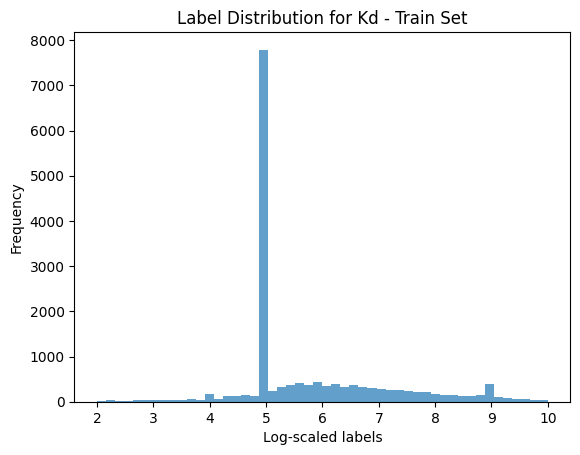

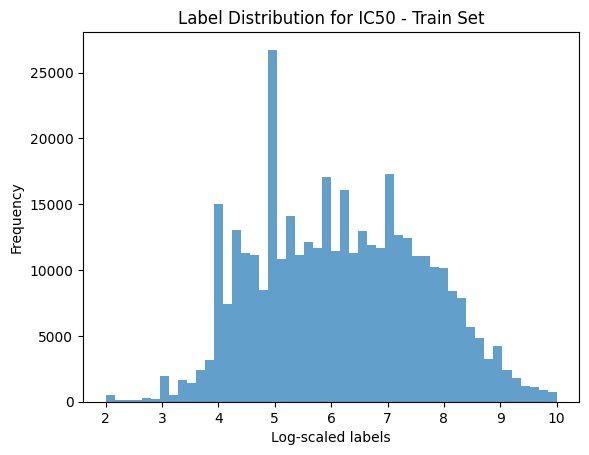

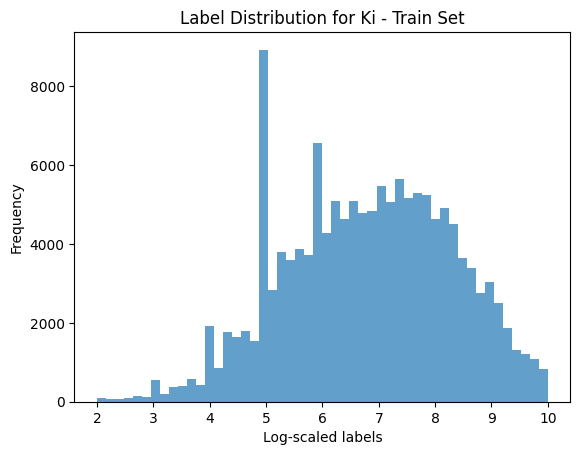

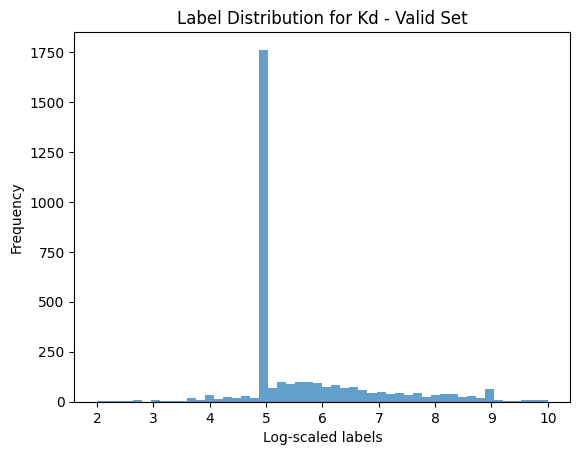

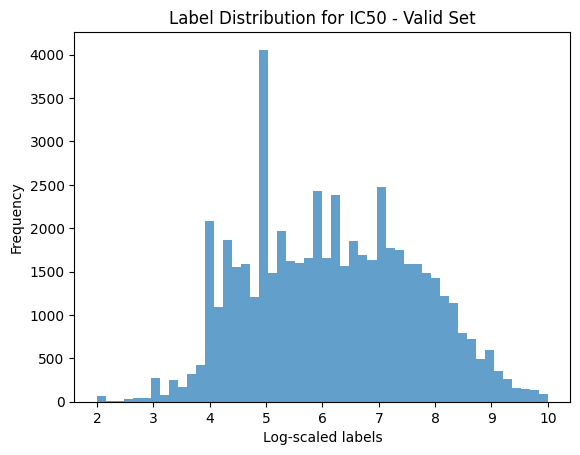

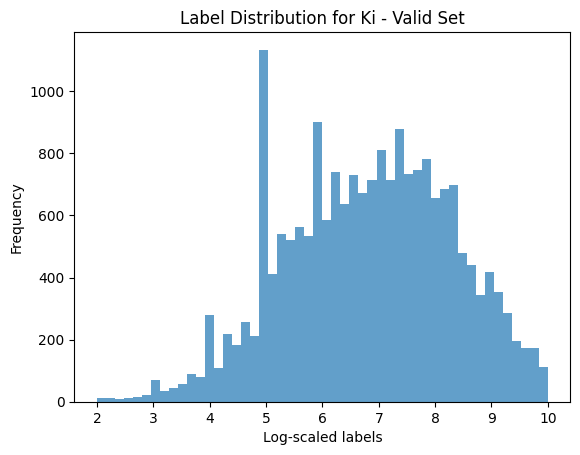

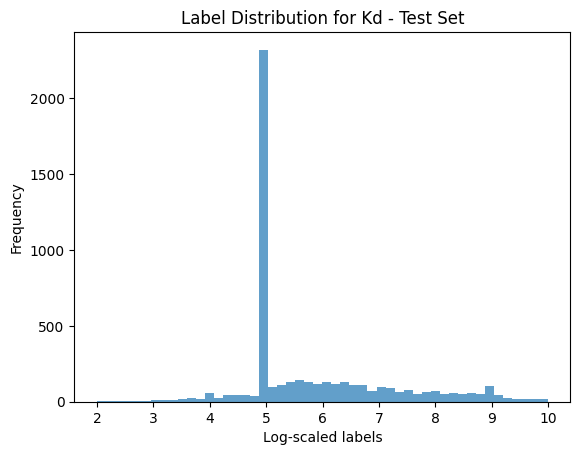

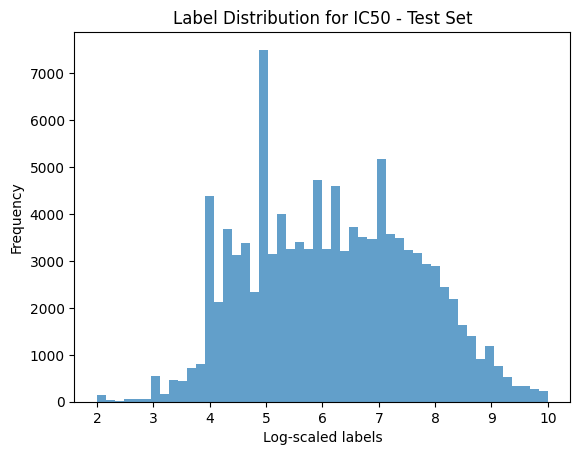

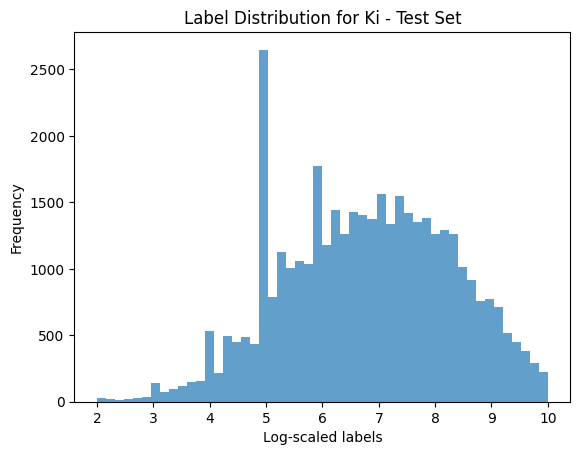

Basic Statistics for Kd - Train Set:
            Drug_ID             Y
count  1.627000e+04  16270.000000
mean   2.168784e+07      5.781090
std    3.229906e+07      1.351537
min    5.720000e+02      2.000000
25%    5.329102e+06      4.999996
50%    1.011398e+07      4.999996
75%    2.198551e+07      6.494714
max    1.388059e+08      9.999996
Number of unique compounds: 3306
Number of unique targets: 893


Basic Statistics for IC50 - Train Set:
            Drug_ID              Y
count  3.824710e+05  385739.000000
mean   5.787575e+07       6.184852
std    4.317362e+07       1.464015
min    3.660000e+02       2.000000
25%    1.335687e+07       4.999996
50%    5.337396e+07       6.143815
75%    9.023189e+07       7.300162
max    1.458668e+08      10.000000
Number of unique compounds: 212008
Number of unique targets: 3973


Basic Statistics for Ki - Train Set:
            Drug_ID              Y
count  1.413970e+05  142245.000000
mean   4.450139e+07       6.792074
std    3.940461e+07       1.

In [77]:
from tdc.chem_utils import MolFilter
import matplotlib.pyplot as plt
import pandas as pd
from tdc.multi_pred import DTI
from transformers import AutoTokenizer, AutoModelForMaskedLM
import torch
from torch import nn

# Load datasets
data_kd = DTI(name='BindingDB_Kd')
data_ic50 = DTI(name='BindingDB_IC50')
data_ki = DTI(name='BindingDB_Ki')

# Convert labels to log space for each dataset
data_kd.convert_to_log(form='binding')
data_ic50.convert_to_log(form='binding')
data_ki.convert_to_log(form='binding')

# Perform a cold-start split on the datasets
split_kd = data_kd.get_split(method='cold_split', column_name='Drug')
split_ic50 = data_ic50.get_split(method='cold_split', column_name='Drug')
split_ki = data_ki.get_split(method='cold_split', column_name='Drug')

# Define the molecule filter function
def filter_molecules(data, smiles_column):
    # Initialize MolFilter with desired criteria
    mol_filter = MolFilter(filters=['PAINS'], HBD=[0, 5], HBA=[0, 10], LogP=[-5, 5], MW=[180, 500], Rot=[0, 10], TPSA=[20, 130])
    
    # Apply MolFilter to the list of SMILES strings and get the filtered list
    smiles_list = data[smiles_column].tolist()
    filtered_smiles_list = mol_filter(smiles_list)
    
    # Find indices of rows with SMILES that are in the filtered_smiles_list
    filtered_indices = data[smiles_column].isin(filtered_smiles_list)
    
    # Select rows that passed the filters
    filtered_data = data[filtered_indices]
    return filtered_data

# Apply filtering to each split
filtered_split_kd = {split: filter_molecules(split_kd[split], 'Drug') for split in ['train', 'valid', 'test']}
filtered_split_ic50 = {split: filter_molecules(split_ic50[split], 'Drug') for split in ['train', 'valid', 'test']}
filtered_split_ki = {split: filter_molecules(split_ki[split], 'Drug') for split in ['train', 'valid', 'test']}



# Add this function after defining filter_molecules
def align_labels(filtered_data, original_split):
    """Aligns labels with the filtered dataset.

    Args:
        filtered_data (DataFrame): The DataFrame after filtering molecules.
        original_split (DataFrame): The original DataFrame before filtering.

    Returns:
        Series: A pandas Series containing the aligned labels.
    """
    # Ensure labels are aligned with the filtered data
    # This assumes the original_split DataFrame has the same index as filtered_data
    aligned_labels = original_split.loc[filtered_data.index, 'Y']
    return aligned_labels

# Apply filtering and label alignment to each split
# Update the filtered_split_* dictionaries to also store aligned labels
filtered_split_kd = {
    split: {
        'data': filter_molecules(split_kd[split], 'Drug'),
        'labels': None  # Placeholder for aligned labels
    } for split in ['train', 'valid', 'test']
}
filtered_split_ic50 = {
    split: {
        'data': filter_molecules(split_ic50[split], 'Drug'),
        'labels': None
    } for split in ['train', 'valid', 'test']
}
filtered_split_ki = {
    split: {
        'data': filter_molecules(split_ki[split], 'Drug'),
        'labels': None
    } for split in ['train', 'valid', 'test']
}

# Align labels for each split of each dataset
for dataset in [filtered_split_kd, filtered_split_ic50, filtered_split_ki]:
    for split in dataset:
        dataset[split]['labels'] = align_labels(dataset[split]['data'], split_kd[split] if dataset is filtered_split_kd else split_ic50[split] if dataset is filtered_split_ic50 else split_ki[split])

# Function to visualize label distribution
def visualize_label_distribution(data, title):
    plt.hist(data['Y'], bins=50, alpha=0.7)
    plt.title(f'Label Distribution for {title}')
    plt.xlabel('Log-scaled labels')
    plt.ylabel('Frequency')
    plt.show()

# Now, when visualizing label distribution, use the aligned labels:
for split in ['train', 'valid', 'test']:
    visualize_label_distribution(pd.DataFrame(filtered_split_kd[split]['labels'], columns=['Y']), f'Kd - {split.capitalize()} Set')
    visualize_label_distribution(pd.DataFrame(filtered_split_ic50[split]['labels'], columns=['Y']), f'IC50 - {split.capitalize()} Set')
    visualize_label_distribution(pd.DataFrame(filtered_split_ki[split]['labels'], columns=['Y']), f'Ki - {split.capitalize()} Set')

# And similarly, update the sections where you generate and use embeddings to utilize the aligned labels.

# Function to print basic statistics
def print_basic_statistics(data, title):
    print(f"Basic Statistics for {title}:")
    print(data.describe())
    num_unique_compounds = data['Drug'].nunique()
    num_unique_targets = data['Target'].nunique()
    print(f"Number of unique compounds: {num_unique_compounds}")
    print(f"Number of unique targets: {num_unique_targets}")
    print("\n")

# Print basic statistics for each split of each dataset
for split in ['train', 'valid', 'test']:
    print_basic_statistics(filtered_split_kd[split]['data'], f'Kd - {split.capitalize()} Set')
    print_basic_statistics(filtered_split_ic50[split]['data'], f'IC50 - {split.capitalize()} Set')
    print_basic_statistics(filtered_split_ki[split]['data'], f'Ki - {split.capitalize()} Set')




In this segment of the preprocessing workflow for a drug-target interaction machine learning model, a validation step is performed to ensure the integrity and alignment of the data after preprocessing, specifically focusing on the KD dataset as an example. This process is crucial for verifying that the dataset is correctly prepared for the model training phase, preventing potential issues that could arise from misaligned data.

Iterating Over Dataset Splits: The code iterates over each split of the KD dataset—train, validation, and test splits. This iteration ensures that the validation check is comprehensive, covering all portions of the dataset that will be used in different stages of model training and evaluation.

Counting Samples and Labels: Within each split, the number of samples and the number of labels ('Y') are counted. The count of samples corresponds to the number of drug molecules that have been filtered based on specific criteria, such as drug-likeness and physicochemical properties. The count of labels refers to the number of binding affinity values (in log space) associated with these samples. This step is crucial for ensuring that each sample (drug molecule) has a corresponding label (binding affinity value), which is essential for supervised learning tasks.

Assertion for Alignment: An assertion is used to check that the number of samples matches the number of labels for each dataset split. This assertion acts as a safeguard against data misalignment, where a sample might not have a corresponding label or vice versa. If the number of samples does not equal the number of labels, the assertion will fail, and an error message will be printed, specifying the split with the mismatch and the counts of samples and labels. This error message aids in quickly identifying and rectifying issues with the dataset preparation.

Printing Dataset Information: If the assertion passes (indicating that the samples and labels are aligned), information about the dataset split is printed, detailing the number of samples and labels. This output serves not only as a confirmation of data integrity but also provides insight into the size of the dataset, which can be useful for understanding the scope of the training, validation, and testing phases.

This validation step is a critical component of the data preprocessing workflow, ensuring that the data is correctly prepared and aligned before proceeding to model training. By verifying the alignment between samples and labels, this process helps to ensure the reliability and effectiveness of the subsequent machine learning model in predicting drug-target interactions.

In [19]:
import os
import pandas as pd

# Define the save_to_csv function
def save_to_csv(data_dict, prefix):
    save_dir = "filtered_data"
    os.makedirs(save_dir, exist_ok=True)  # Ensure the directory exists

    for split in data_dict:
        # Define the paths for data and labels
        data_path = os.path.join(save_dir, f"{prefix}_{split}_data.csv")
        labels_path = os.path.join(save_dir, f"{prefix}_{split}_labels.csv")

        # Save the data and labels to CSV files
        data_dict[split]['data'].to_csv(data_path, index=False)
        # Assuming labels is a pandas Series; if it's not, you might need to adjust this
        data_dict[split]['labels'].to_csv(labels_path, index=False)

        print(f"Saved filtered data to {data_path}")
        print(f"Saved aligned labels to {labels_path}")

# Call the save_to_csv function for each dataset
save_to_csv(filtered_split_kd, 'kd')
save_to_csv(filtered_split_ic50, 'ic50')
save_to_csv(filtered_split_ki, 'ki')


Saved filtered data to filtered_data/kd_train_data.csv
Saved aligned labels to filtered_data/kd_train_labels.csv
Saved filtered data to filtered_data/kd_valid_data.csv
Saved aligned labels to filtered_data/kd_valid_labels.csv
Saved filtered data to filtered_data/kd_test_data.csv
Saved aligned labels to filtered_data/kd_test_labels.csv
Saved filtered data to filtered_data/ic50_train_data.csv
Saved aligned labels to filtered_data/ic50_train_labels.csv
Saved filtered data to filtered_data/ic50_valid_data.csv
Saved aligned labels to filtered_data/ic50_valid_labels.csv
Saved filtered data to filtered_data/ic50_test_data.csv
Saved aligned labels to filtered_data/ic50_test_labels.csv
Saved filtered data to filtered_data/ki_train_data.csv
Saved aligned labels to filtered_data/ki_train_labels.csv
Saved filtered data to filtered_data/ki_valid_data.csv
Saved aligned labels to filtered_data/ki_valid_labels.csv
Saved filtered data to filtered_data/ki_test_data.csv
Saved aligned labels to filtered_d

In [20]:
for split in ['train', 'valid', 'test']:
    # Assuming 'data' is a DataFrame and contains the samples
    num_samples = len(filtered_split_kd[split]['data'])
    
    # Assuming 'labels' is a list or Series
    num_labels = len(filtered_split_kd[split]['labels'])
    
    assert num_samples == num_labels, f"Mismatch in {split}: samples={num_samples}, labels={num_labels}"
    print(f"{split.capitalize()} set: {num_samples} samples, {num_labels} labels (Aligned)")


Train set: 16270 samples, 16270 labels (Aligned)
Valid set: 3447 samples, 3447 labels (Aligned)
Test set: 5115 samples, 5115 labels (Aligned)


In [21]:
for split in ['train', 'valid', 'test']:
    # Assuming 'data' is a DataFrame and contains the samples
    num_samples = len(filtered_split_ki[split]['data'])
    
    # Assuming 'labels' is a list or Series
    num_labels = len(filtered_split_ki[split]['labels'])
    
    assert num_samples == num_labels, f"Mismatch in {split}: samples={num_samples}, labels={num_labels}"
    print(f"{split.capitalize()} set: {num_samples} samples, {num_labels} labels (Aligned)")

Train set: 142245 samples, 142245 labels (Aligned)
Valid set: 20075 samples, 20075 labels (Aligned)
Test set: 39469 samples, 39469 labels (Aligned)


In [22]:
for split in ['train', 'valid', 'test']:
    # Assuming 'data' is a DataFrame and contains the samples
    num_samples = len(filtered_split_ic50[split]['data'])
    
    # Assuming 'labels' is a list or Series
    num_labels = len(filtered_split_ic50[split]['labels'])
    
    assert num_samples == num_labels, f"Mismatch in {split}: samples={num_samples}, labels={num_labels}"
    print(f"{split.capitalize()} set: {num_samples} samples, {num_labels} labels (Aligned)")

Train set: 385739 samples, 385739 labels (Aligned)
Valid set: 54896 samples, 54896 labels (Aligned)
Test set: 110363 samples, 110363 labels (Aligned)



In this expanded phase of preprocessing for a drug-target interaction machine learning model, after ensuring data integrity and alignment, the workflow progresses to generate embeddings for both drugs and targets. This step is pivotal for transforming the chemical structures and protein sequences into a format that machine learning models can effectively utilize. Embeddings represent high-dimensional vector spaces where similar entities are closer together, facilitating the learning of complex relationships.

Generating Drug Embeddings:

Initialization: The process begins with the initialization of a tokenizer and model specifically designed for chemical structures (SMILES strings), using the pre-trained ChemBERTa-zinc-base-v1 model from the Hugging Face transformers library. This model is adept at understanding and processing chemical language.
Embedding Function: A function, get_drug_embeddings, is defined to convert a list of SMILES strings into embeddings. For each SMILES string, it tokenizes the string, passes the tokens through the pre-trained model, and applies mean pooling over the output to get a single embedding vector for each molecule.
Application: This function is then applied to the filtered drug lists from the KD, IC50, and Ki datasets across their respective train, validation, and test splits, generating embeddings for each drug.
Generating Target (Protein) Embeddings:

Initialization: Similarly, a tokenizer and model are initialized for protein sequences using the Rostlab/prot_bert pre-trained model. This model is designed to capture the complexity of protein sequences.
Embedding Function: The get_target_embeddings function is crafted to process a list of protein sequences. By adding specific tokens that ProtBERT recognizes (such as "A" for the start and "B" for the end of sequences), it generates embeddings for each sequence, focusing on the embedding of the [CLS] token, which is intended to represent the entire sequence's information.
Application: This embedding function is applied to the target sequences from each dataset split, producing embeddings for each target.
Validation of Embeddings:

Following the generation of drug and target embeddings, a validation step ensures that the number of embeddings matches the number of labels in each dataset split. This check is crucial for verifying that each drug and target pair has corresponding embeddings and labels, ensuring data consistency and alignment for model training.
Assertions are used to verify that the number of drug embeddings, target embeddings, and labels are equal within each split. If any mismatch is detected, it raises an error, prompting a review and correction of the preprocessing steps.
Upon successful validation, confirmation messages are printed, indicating the number of drug embeddings, target embeddings, and labels, and confirming their alignment.
This detailed preprocessing and validation ensure that the input data for the machine learning model is not only clean and relevant but also transformed into a format that encapsulates the complex chemical and biological information necessary for predicting drug-target interactions accurately.

In [23]:
from transformers import AutoTokenizer, AutoModel
import torch

# Initialize tokenizer and model for drug embeddings
drug_tokenizer = AutoTokenizer.from_pretrained("seyonec/ChemBERTa-zinc-base-v1")
drug_model = AutoModel.from_pretrained("seyonec/ChemBERTa-zinc-base-v1")

# Function to get drug embeddings from SMILES strings
def get_drug_embeddings(smiles_list, tokenizer, model, batch_size=32):
    embeddings = []
    for i in range(0, len(smiles_list), batch_size):
        batch = smiles_list[i:i+batch_size]
        encoding = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        input_ids = encoding["input_ids"]
        attention_mask = encoding["attention_mask"]  # Get the attention mask
        
        with torch.no_grad():
            # Pass both input_ids and attention_mask to the model
            output = model(input_ids, attention_mask=attention_mask)
            # You can use either the last hidden state or the pooled output
            # depending on your requirements. Here we're using the mean of the last hidden state.
            embedding = output.last_hidden_state.mean(1)
            embeddings.extend(embedding.cpu().numpy())
            
    return embeddings


# Generate drug embeddings for each split of each dataset
drug_embeddings_split_kd = {split: get_drug_embeddings(filtered_split_kd[split]['data']['Drug'].tolist(), drug_tokenizer, drug_model) for split in ['train', 'valid', 'test']}
drug_embeddings_split_ic50 = {split: get_drug_embeddings(filtered_split_ic50[split]['data']['Drug'].tolist(), drug_tokenizer, drug_model) for split in ['train', 'valid', 'test']}
drug_embeddings_split_ki = {split: get_drug_embeddings(filtered_split_ki[split]['data']['Drug'].tolist(), drug_tokenizer, drug_model) for split in ['train', 'valid', 'test']}

# Now, kd_drug_embeddings, ic50_drug_embeddings, and ki_drug_embeddings are dictionaries
# containing embeddings for training, validation, and test sets, respectively.

In [24]:
import os
# Assuming filtered_split_kd, filtered_split_ic50, filtered_split_ki are already defined

# Function to find the maximum length of target sequences
def find_max_sequence_length(*datasets):
    max_length = 0
    for dataset in datasets:
        for split in dataset:
            sequences = dataset[split]['data']['Target'].tolist()
            max_length = max(max_length, max([len(seq) for seq in sequences]))
    # Add extra length for special tokens (e.g., [CLS], [SEP] for BERT models)
    return max_length + 2

# Calculate max_length
max_sequence_length = find_max_sequence_length(filtered_split_kd, filtered_split_ic50, filtered_split_ki)
print("Maximum sequence length:", max_sequence_length)

# Adjusted function to get target embeddings with batch processing
def get_target_embeddings(protein_sequences, tokenizer, model, max_length, batch_size=32):
    model.eval()  # Ensure the model is in evaluation mode
    embeddings = []
    for i in range(0, len(protein_sequences), batch_size):
        batch = protein_sequences[i:i + batch_size]
        encoding = tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=max_length)
        input_ids = encoding["input_ids"]
        attention_mask = encoding["attention_mask"]

        with torch.no_grad():
            output = model(input_ids, attention_mask=attention_mask)
            embedding = output.last_hidden_state[:, 0, :]  # Taking the embedding from the [CLS] token
            embeddings.extend(embedding.cpu().numpy())
    return embeddings

# Initialize tokenizer and model for target (protein) embeddings
protein_tokenizer = AutoTokenizer.from_pretrained("Rostlab/prot_bert", do_lower_case=False)
protein_model = AutoModel.from_pretrained("Rostlab/prot_bert")

# Example usage: Generate target embeddings for each split of the datasets
batch_size = 32  # Define a suitable batch size

kd_target_embeddings = {
    split: get_target_embeddings(filtered_split_kd[split]['data']['Target'].tolist(),
                                 protein_tokenizer, protein_model, batch_size)
    for split in ['train', 'valid', 'test']
}

ic50_target_embeddings = {
    split: get_target_embeddings(filtered_split_ic50[split]['data']['Target'].tolist(),
                                 protein_tokenizer, protein_model, batch_size)
    for split in ['train', 'valid', 'test']
}

ki_target_embeddings = {
    split: get_target_embeddings(filtered_split_ki[split]['data']['Target'].tolist(),
                                 protein_tokenizer, protein_model, batch_size)
    for split in ['train', 'valid', 'test']
}

# Now, kd_target_embeddings, ic50_target_embeddings, and ki_target_embeddings are dictionaries
# containing embeddings for training, validation, and test sets, respectively.


Maximum sequence length: 7075


In [25]:
# Include the check for drug embeddings length as well

datasets = {
    'KD': (drug_embeddings_split_kd, kd_target_embeddings, filtered_split_kd),
    'IC50': (drug_embeddings_split_ic50, ic50_target_embeddings, filtered_split_ic50),
    'Ki': (drug_embeddings_split_ki, ki_target_embeddings, filtered_split_ki)
}

for dataset_name, (drug_embeddings, target_embeddings, filtered_split) in datasets.items():
    print(f"--- Checking {dataset_name} Dataset ---")
    for split in ['train', 'valid', 'test']:
        num_drug_embeddings = len(drug_embeddings[split])
        num_target_embeddings = len(target_embeddings[split])
        # Ensure we're checking against the 'labels' key for aligned labels
        num_labels = len(filtered_split[split]['labels'])

        print(f"Checking {split.capitalize()} Set:")
        assert num_drug_embeddings == num_labels, f"Mismatch in number of drug embeddings and labels in {split} set: {num_drug_embeddings} vs {num_labels}"
        assert num_target_embeddings == num_labels, f"Mismatch in number of target embeddings and labels in {split} set: {num_target_embeddings} vs {num_labels}"
        print(f"All good: {num_drug_embeddings} drug embeddings, {num_target_embeddings} target embeddings, {num_labels} labels")


--- Checking KD Dataset ---
Checking Train Set:
All good: 16270 drug embeddings, 16270 target embeddings, 16270 labels
Checking Valid Set:
All good: 3447 drug embeddings, 3447 target embeddings, 3447 labels
Checking Test Set:
All good: 5115 drug embeddings, 5115 target embeddings, 5115 labels
--- Checking IC50 Dataset ---
Checking Train Set:
All good: 385739 drug embeddings, 385739 target embeddings, 385739 labels
Checking Valid Set:
All good: 54896 drug embeddings, 54896 target embeddings, 54896 labels
Checking Test Set:
All good: 110363 drug embeddings, 110363 target embeddings, 110363 labels
--- Checking Ki Dataset ---
Checking Train Set:
All good: 142245 drug embeddings, 142245 target embeddings, 142245 labels
Checking Valid Set:
All good: 20075 drug embeddings, 20075 target embeddings, 20075 labels
Checking Test Set:
All good: 39469 drug embeddings, 39469 target embeddings, 39469 labels



To concatenate the embeddings for each drug-target pair, can use the following code. This function will concatenate the drug and target embeddings for each dataset and each split (train, validation, test). It assumes that the embeddings are NumPy arrays.

This phase focuses on the final steps of preparing the drug-target interaction data for model training, specifically on concatenating embeddings and validating their structure and data types.

Concatenating Embeddings:

The process begins with defining a function, concatenate_embeddings, which concatenates drug and target embeddings into a single feature vector for each drug-target pair. This is crucial because the machine learning model will learn from these combined features to predict the interaction strength.
This function is applied to the drug and target embeddings of each dataset split (train, validation, test) for the KD, IC50, and Ki datasets, resulting in a set of concatenated embeddings ready for use in model training and evaluation.
Verifying Concatenated Embeddings:

Following concatenation, a check is performed to ensure that the number of concatenated features matches the number of labels in each dataset split. This verification is vital to ensure that every input feature vector (X) has a corresponding label (Y), which is necessary for supervised learning.
The lengths of the concatenated features and labels are printed for each split of the KD dataset, and an assertion checks for equality. If the number of features and labels matches, it confirms that the data is correctly aligned and ready for the next steps.
Checking Embeddings' Integrity:

A detailed function, check_embeddings, is defined and executed to assess the integrity of the concatenated embeddings across several criteria, including whether all embeddings are NumPy arrays, their shapes are consistent, their data types are either float32 or float64, and they are all 2-dimensional. This thorough check ensures the embeddings' uniformity and suitability for feeding into a deep learning model.
Determining Embeddings' Data Type:

Another function, check_embeddings_data_type, is defined to ascertain the precise data type of the embeddings, whether np.float32 or np.float64. This distinction is significant for computational efficiency and model performance, as different architectures might be optimized for specific data types.
The data types of embeddings in each split of the KD, IC50, and Ki datasets are checked and reported. Consistency in data type across all embeddings is critical for ensuring model training runs smoothly and efficiently.
These steps ensure that the drug and target embeddings are not only correctly concatenated but also meet specific criteria for uniformity and data integrity, setting a solid foundation for the subsequent machine learning model training and evaluation phases. Ensuring data is correctly prepared in this manner is crucial for the development of accurate and reliable drug-target interaction predictions.







In [26]:
import numpy as np

# Assuming drug_embeddings_split_kd, target_embeddings_split_kd, etc., are defined as shown earlier

def concatenate_embeddings(drug_embeddings, target_embeddings):
    concatenated_embeddings = [np.concatenate((drug_emb, target_emb))
                               for drug_emb, target_emb in zip(drug_embeddings, target_embeddings)]
    return concatenated_embeddings

# Concatenate embeddings for KD, IC50, and Ki datasets across all splits
concatenated_embeddings_split_kd = {
    split: concatenate_embeddings(drug_embeddings_split_kd[split], kd_target_embeddings[split])
    for split in ['train', 'valid', 'test']
}

concatenated_embeddings_split_ic50 = {
    split: concatenate_embeddings(drug_embeddings_split_ic50[split], ic50_target_embeddings[split])
    for split in ['train', 'valid', 'test']
}

concatenated_embeddings_split_ki = {
    split: concatenate_embeddings(drug_embeddings_split_ki[split], ki_target_embeddings[split])
    for split in ['train', 'valid', 'test']
}


In [27]:


datasets = {
    'KD': (concatenated_embeddings_split_kd, filtered_split_kd),
    'IC50': (concatenated_embeddings_split_ic50, filtered_split_ic50),
    'Ki': (concatenated_embeddings_split_ki, filtered_split_ki)
}

for dataset_name, (concatenated_embeddings, filtered_split) in datasets.items():
    print(f"--- Checking {dataset_name} Dataset ---")
    for split in ['train', 'valid', 'test']:
        # Number of samples in concatenated features
        num_features = len(concatenated_embeddings[split])
        # Number of labels, ensuring to access 'labels' key as updated
        num_labels = len(filtered_split[split]['labels'])

        print(f"{dataset_name} Dataset - {split.capitalize()} Split:")
        print(f"Length of concatenated features (X): {num_features}")
        print(f"Length of labels (Y): {num_labels}")
        
        # Perform the check
        assert num_features == num_labels, f"Mismatch between the number of concatenated features and labels in {split} set."
        print("All good: The number of concatenated features matches the number of labels.\n")


--- Checking KD Dataset ---
KD Dataset - Train Split:
Length of concatenated features (X): 16270
Length of labels (Y): 16270
All good: The number of concatenated features matches the number of labels.

KD Dataset - Valid Split:
Length of concatenated features (X): 3447
Length of labels (Y): 3447
All good: The number of concatenated features matches the number of labels.

KD Dataset - Test Split:
Length of concatenated features (X): 5115
Length of labels (Y): 5115
All good: The number of concatenated features matches the number of labels.

--- Checking IC50 Dataset ---
IC50 Dataset - Train Split:
Length of concatenated features (X): 385739
Length of labels (Y): 385739
All good: The number of concatenated features matches the number of labels.

IC50 Dataset - Valid Split:
Length of concatenated features (X): 54896
Length of labels (Y): 54896
All good: The number of concatenated features matches the number of labels.

IC50 Dataset - Test Split:
Length of concatenated features (X): 110363


In [28]:
import numpy as np

# Function to check the embeddings for each dataset and split
def check_concatenated_embeddings(concatenated_embeddings_dict, filtered_split):
    for split in ['train', 'valid', 'test']:
        # Retrieve concatenated embeddings and labels for the current split
        concatenated_embeddings = concatenated_embeddings_dict[split]
        labels = filtered_split[split]['labels']
        
        # Check lengths of concatenated features against labels
        num_features = len(concatenated_embeddings)
        num_labels = len(labels)
        
        print(f"Checking {split.capitalize()} Split:")
        print(f"Length of concatenated features (X): {num_features}")
        print(f"Length of labels (Y): {num_labels}")
        
        assert num_features == num_labels, f"Mismatch between the number of concatenated features and labels in the {split} set."
        
        # Additional checks on concatenated embeddings
        if not all(isinstance(e, np.ndarray) for e in concatenated_embeddings):
            print(f"Error in {split}: Not all concatenated embeddings are NumPy arrays.")
            return False
        
        # Assuming all embeddings should have the same shape after concatenation
        shapes = [e.shape for e in concatenated_embeddings]
        if len(set(shapes)) != 1:
            print(f"Error in {split}: Concatenated embeddings have inconsistent shapes: {shapes}")
            return False
        
        if not all(e.dtype == np.float32 or e.dtype == np.float64 for e in concatenated_embeddings):
            print(f"Error in {split}: Concatenated embeddings have inconsistent data types.")
            return False
        
        if not all(len(e.shape) == 1 for e in concatenated_embeddings):  # Checking if embeddings are 1D
            print(f"Error in {split}: Some concatenated embeddings are not 1D.")
            return False
        
        print("All good: The concatenated embeddings' properties are consistent.\n")

# Perform the checks for KD, IC50, and Ki datasets
print("Checking KD concatenated embeddings...")
check_concatenated_embeddings(concatenated_embeddings_split_kd, filtered_split_kd)

print("Checking IC50 concatenated embeddings...")
check_concatenated_embeddings(concatenated_embeddings_split_ic50, filtered_split_ic50)

print("Checking Ki concatenated embeddings...")
check_concatenated_embeddings(concatenated_embeddings_split_ki, filtered_split_ki)


Checking KD concatenated embeddings...
Checking Train Split:
Length of concatenated features (X): 16270
Length of labels (Y): 16270
All good: The concatenated embeddings' properties are consistent.

Checking Valid Split:
Length of concatenated features (X): 3447
Length of labels (Y): 3447
All good: The concatenated embeddings' properties are consistent.

Checking Test Split:
Length of concatenated features (X): 5115
Length of labels (Y): 5115
All good: The concatenated embeddings' properties are consistent.

Checking IC50 concatenated embeddings...
Checking Train Split:
Length of concatenated features (X): 385739
Length of labels (Y): 385739
All good: The concatenated embeddings' properties are consistent.

Checking Valid Split:
Length of concatenated features (X): 54896
Length of labels (Y): 54896
All good: The concatenated embeddings' properties are consistent.

Checking Test Split:
Length of concatenated features (X): 110363
Length of labels (Y): 110363
All good: The concatenated em

Now lets check to see which np.float it is? np.float32 or np.float64

In [29]:
# Function to check data types of embeddings
def check_embeddings_data_type(embeddings_dict):
    for split, embeddings in embeddings_dict.items():
        # Check data type of each embedding array
        data_types = [emb.dtype for emb in embeddings]
        
        # Check if all data types are np.float32
        if all(dtype == np.float32 for dtype in data_types):
            print(f"All embeddings in {split} are np.float32.")
        else:
            print(f"Different data types found in {split}: {data_types}")

# Check data types for KD embeddings
print("Checking KD embeddings data types...")
check_embeddings_data_type(concatenated_embeddings_split_kd)

# Check data types for IC50 embeddings
print("Checking IC50 embeddings data types...")
check_embeddings_data_type(concatenated_embeddings_split_ic50)

# Check data types for KI embeddings
print("Checking KI embeddings data types...")
check_embeddings_data_type(concatenated_embeddings_split_ki)


Checking KD embeddings data types...
All embeddings in train are np.float32.
All embeddings in valid are np.float32.
All embeddings in test are np.float32.
Checking IC50 embeddings data types...
All embeddings in train are np.float32.
All embeddings in valid are np.float32.
All embeddings in test are np.float32.
Checking KI embeddings data types...
All embeddings in train are np.float32.
All embeddings in valid are np.float32.
All embeddings in test are np.float32.



The PCA and t-SNE visualizations outputted show how the high-dimensional drug-target interaction embeddings are distributed when reduced to two dimensions.

PCA Visualization:

The PCA plot shows a relatively dense cluster in the center with some points spread out more widely. This could indicate that while many of the samples have similar features (hence clustering near the center), there are also quite a few that are different (the points spread out from the center).
The lack of distinct, separate clusters in the PCA plot suggests that the variability within the data isn't strongly polarized along the two principal components. This might mean that the data doesn't have clear-cut, separable classes, or that PCA's linear reduction isn't capturing the complexity of the interactions.
t-SNE Visualization:

The t-SNE plot shows a more nuanced structure with several small clusters and regions of varying data density. This is typical of t-SNE visualizations, which can reveal local structures and relationships that PCA might miss.
Some clustering can be observed, but the groups are not very distinct, with much of the data still forming a continuous, albeit non-uniform, field. This may suggest that while there are some localized patterns, the overall dataset is quite complex with possibly overlapping classes or a smooth gradient of properties.
What These Results Tell Us:

Complexity of Data: Both visualizations suggest that the drug-target interaction space is complex, with no simple divisions. This is consistent with the nature of biological data, which often exists along a continuum with nuanced variations rather than discrete classes.
Embedding Quality: The embeddings appear to capture a range of information, given the spread in the visualizations, but there might not be simple, easily separable features that can be used for classification or regression. The embeddings may still be very useful for machine learning, but it's likely that sophisticated models (like deep neural networks) will be needed to capture the subtleties in the data.
Model Selection: Given the lack of distinct clustering, models that can handle complex patterns and subtle distinctions are likely to perform better. Non-linear models, such as deep learning models that can capture complex relationships, may be required.
Further Analysis: It may be helpful to color these plots based on known properties (like whether a drug is active/inactive or the target's class) to see if any of the visible clusters correspond to meaningful biological or chemical distinctions.
Remember, PCA and t-SNE are just tools for exploring high-dimensional data and should be used alongside other data analysis and machine learning techniques. These plots do not necessarily determine the predictiveness of the features but can provide insights into the structure of the dataset and inform further analysis.







Based on the complexity of the data as revealed by the PCA and t-SNE visualizations, and the fact that we looking to predict continuous values (such as binding affinity) rather than discrete classes, regression models would indeed be appropriate. Here are the types of machine learning models that might be effective for this type of data:

Regression Models:
Linear Regression Models: As a starting point, we might want to try simple linear regression to establish a baseline, even though it is unlikely to perform well given the complexity suggested by the EDA.
Tree-Based Models: More sophisticated tree-based models like Random Forests or Gradient Boosting Machines (e.g., XGBoost, LightGBM) that can capture non-linear relationships and interactions between features.
Support Vector Machines: SVMs with non-linear kernels can be useful for regression tasks (SVR - Support Vector Regression) in complex spaces.
Deep Learning Models:
Fully Connected Neural Networks: Also known as multilayer perceptrons (MLPs), these networks can model complex relationships and interactions.
Convolutional Neural Networks (CNNs): While typically used for image data, CNNs can also be applied to structured, non-image data if there is some local structure in the feature space.
Recurrent Neural Networks (RNNs): Useful if the data can be structured as sequences, such as time-series data or if the order of features carries important information.
Transformer Models: These can be particularly promising due to their ability to model complex dependencies and patterns in data. Transformers can be used for regression tasks by adapting the output layer to predict continuous values instead of classes.
Model Considerations:
Data Nature: Given the non-distinct clustering and the possibility of overlapping properties, it is likely that deep learning models, particularly those that can handle complex patterns (like CNNs or Transformers), would be better suited for capturing the subtleties within your data.
Transformers: Transformer models are powerful tools for capturing complex relationships in data. They can be particularly effective if we have enough data and computational resources to train them properly. It's important to note that transformers can be used for both classification and regression tasks; for regression, we would typically use the output of the transformer and pass it through a fully connected layer to obtain a single continuous output.
Transfer Learning: If we have pre-trained transformer models that are trained on relevant biological or chemical data, fine-tuning them on our specific regression task could lead to good performance.
Evaluation and Tuning:
Cross-Validation: Use techniques like k-fold cross-validation to evaluate model performance and generalizability.
Hyperparameter Tuning: Utilize grid search or randomized search to find the best hyperparameters for our models.
Performance Metrics: Since this is a regression task, we will be looking at metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (coefficient of determination).
Conclusion:
The lack of clear, separable clusters indicates that our dataset likely contains complex, non-linear relationships that are best captured by models capable of handling such complexity. Non-linear models and deep learning approaches, including transformer models adapted for regression, would be suitable choices to explore for predicting drug-target interactions.





Now for a simple Linear Regression Model: we expect poor results but want to ensure preprocessing steps work well enough for a simple model

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
import numpy as np
import math

# Function to train and evaluate a linear regression model, returning multiple metrics
def train_and_evaluate_linear_regression(X_train, y_train, X_val, y_val):
    # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = model.predict(X_val)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_val, y_pred)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    # Calculate Pearson Correlation Coefficient
    pcc, _ = pearsonr(y_val, y_pred)
    
    return mse, rmse, mae, r2, pcc

# Assume `prepare_embeddings_for_visualization` and dataset preparation code is defined as discussed earlier

# Loop through each dataset to train and evaluate models
datasets_embeddings = {
    'KD': (concatenated_embeddings_split_kd, filtered_split_kd),
    'IC50': (concatenated_embeddings_split_ic50, filtered_split_ic50),
    'Ki': (concatenated_embeddings_split_ki, filtered_split_ki)
}

for dataset_name, (concatenated_embeddings, filtered_split) in datasets_embeddings.items():
    # Prepare features and labels for training and validation sets
    X_train = prepare_embeddings_for_visualization(concatenated_embeddings['train'])
    y_train = np.array(filtered_split['train']['labels'])
    X_val = prepare_embeddings_for_visualization(concatenated_embeddings['valid'])
    y_val = np.array(filtered_split['valid']['labels'])

    # Train and evaluate the model
    mse, rmse, mae, r2, pcc = train_and_evaluate_linear_regression(X_train, y_train, X_val, y_val)
    
    # Print the evaluation metrics
    print(f"{dataset_name} Dataset - Validation Metrics:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R-squared: {r2}")
    print(f"Pearson Correlation Coefficient: {pcc}\n")


KD Dataset - Validation Metrics:
MSE: 4.003883432921566
RMSE: 2.0009706227032837
MAE: 1.6521721996597767
R-squared: -1.6410826870539967
Pearson Correlation Coefficient: 0.13099663838082679

IC50 Dataset - Validation Metrics:
MSE: 1.7577632029285015
RMSE: 1.3258066235045372
MAE: 1.0866310628423284
R-squared: 0.1787567518441583
Pearson Correlation Coefficient: 0.42340131818473414

Ki Dataset - Validation Metrics:
MSE: 1.8902937166404217
RMSE: 1.3748795280461563
MAE: 1.1277417074233058
R-squared: 0.1351345046923249
Pearson Correlation Coefficient: 0.37362593666318156



# Linear Regression with K-fold Cross Validation



Imports Essential Libraries:

numpy for numerical operations
math for calculating the square root (for RMSE)
LinearRegression from sklearn.linear_model for the model
Metrics like MSE, MAE, R2 score from sklearn.metrics
pearsonr from scipy.stats for correlation
KFold from sklearn.model_selection for cross-validation
Defines a Function for Cross-Validation:

train_and_evaluate_linear_regression_kfold(X, y, n_splits=5)
Initializes a linear regression model
Creates a KFold object with n_splits (default 5)
Iterates through the folds:
Splits data into training and validation sets
Trains the model on the training set
Predicts on the validation set
Calculates evaluation metrics (MSE, RMSE, MAE, R2, PCC)
Collects metrics for each fold
Returns mean metrics across folds
Prepares Data (assuming external functions):

Uses prepare_embeddings_for_visualization to process features
Loads datasets and splits them into training and validation sets
Iterates over Datasets:

For each dataset:
Prepares features (X_train using prepare_embeddings_for_visualization) and labels (y_train) for training
Calls the cross-validation function to train and evaluate the model
Prints evaluation metrics
Key Points:

The code adheres to best practices for k-fold cross-validation:
Splitting data into folds for robust model evaluation
Training and evaluating on each fold independently
Averaging metrics across folds for a comprehensive assessment
It employs a variety of evaluation metrics to provide a holistic understanding of model performance.
It demonstrates modularity by defining a reusable cross-validation function.


In [36]:
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
from sklearn.model_selection import KFold

# Function to train and evaluate a linear regression model using k-fold cross-validation
def train_and_evaluate_linear_regression_kfold(X, y, n_splits=5):
    # Initialize the linear regression model
    model = LinearRegression()

    # Initialize k-fold cross-validator
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Initialize lists to store evaluation metrics across folds
    mse_list, rmse_list, mae_list, r2_list, pcc_list = [], [], [], [], []

    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Train the model
        model.fit(X_train, y_train)

        # Predict on the validation set
        y_pred = model.predict(X_val)

        # Calculate evaluation metrics
        mse = mean_squared_error(y_val, y_pred)
        rmse = math.sqrt(mse)
        mae = mean_absolute_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)
        pcc, _ = pearsonr(y_val, y_pred)

        # Append metrics to lists
        mse_list.append(mse)
        rmse_list.append(rmse)
        mae_list.append(mae)
        r2_list.append(r2)
        pcc_list.append(pcc)

    # Compute mean metrics across folds
    mean_mse = np.mean(mse_list)
    mean_rmse = np.mean(rmse_list)
    mean_mae = np.mean(mae_list)
    mean_r2 = np.mean(r2_list)
    mean_pcc = np.mean(pcc_list)

    return mean_mse, mean_rmse, mean_mae, mean_r2, mean_pcc

# Assume `prepare_embeddings_for_visualization` and dataset preparation code is defined as discussed earlier

# Loop through each dataset to train and evaluate models
datasets_embeddings = {
    'KD': (concatenated_embeddings_split_kd, filtered_split_kd),
    'IC50': (concatenated_embeddings_split_ic50, filtered_split_ic50),
    'Ki': (concatenated_embeddings_split_ki, filtered_split_ki)
}

for dataset_name, (concatenated_embeddings, filtered_split) in datasets_embeddings.items():
    # Prepare features and labels for training and validation sets
    X_train = prepare_embeddings_for_visualization(concatenated_embeddings['train'])
    y_train = np.array(filtered_split['train']['labels'])
    X_val = prepare_embeddings_for_visualization(concatenated_embeddings['valid'])
    y_val = np.array(filtered_split['valid']['labels'])

    # Train and evaluate the model using k-fold cross-validation
    mean_mse, mean_rmse, mean_mae, mean_r2, mean_pcc = train_and_evaluate_linear_regression_kfold(X_train, y_train)

    # Print the evaluation metrics
    print(f"{dataset_name} Dataset - Validation Metrics (K-Fold Cross-Validation):")
    print(f"Mean MSE: {mean_mse:.4f}")
    print(f"Mean RMSE: {mean_rmse:.4f}")
    print(f"Mean MAE: {mean_mae:.4f}")
    print(f"Mean R2 Score: {mean_r2:.4f}")
    print(f"Mean Pearson Correlation Coefficient: {mean_pcc:.4f}")


KD Dataset - Validation Metrics (K-Fold Cross-Validation):
Mean MSE: 1.2626
Mean RMSE: 1.1235
Mean MAE: 0.7716
Mean R2 Score: 0.3086
Mean Pearson Correlation Coefficient: 0.5700
IC50 Dataset - Validation Metrics (K-Fold Cross-Validation):
Mean MSE: 1.7293
Mean RMSE: 1.3150
Mean MAE: 1.0771
Mean R2 Score: 0.1932
Mean Pearson Correlation Coefficient: 0.4396
Ki Dataset - Validation Metrics (K-Fold Cross-Validation):
Mean MSE: 1.8227
Mean RMSE: 1.3501
Mean MAE: 1.1080
Mean R2 Score: 0.1775
Mean Pearson Correlation Coefficient: 0.4217


# Linear Regression with K-fold Cross Validation (training and validation set combined)

In [60]:
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
from sklearn.model_selection import KFold

# Function to train and evaluate a linear regression model using k-fold cross-validation
def train_and_evaluate_linear_regression_kfold(X, y, n_splits=5):
    # Initialize the linear regression model
    model = LinearRegression()

    # Initialize k-fold cross-validator
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Initialize lists to store evaluation metrics across folds
    mse_list, rmse_list, mae_list, r2_list, pcc_list = [], [], [], [], []

    for train_idx, val_idx in kf.split(X):
        # Dynamically partition the dataset for this fold
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Train the model
        model.fit(X_train, y_train)

        # Predict on the validation set
        y_pred = model.predict(X_val)

        # Calculate evaluation metrics
        mse = mean_squared_error(y_val, y_pred)
        rmse = math.sqrt(mse)
        mae = mean_absolute_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)
        pcc, _ = pearsonr(y_val, y_pred)

        # Append metrics to lists
        mse_list.append(mse)
        rmse_list.append(rmse)
        mae_list.append(mae)
        r2_list.append(r2)
        pcc_list.append(pcc)

    # Compute mean metrics across folds
    mean_mse = np.mean(mse_list)
    mean_rmse = np.mean(rmse_list)
    mean_mae = np.mean(mae_list)
    mean_r2 = np.mean(r2_list)
    mean_pcc = np.mean(pcc_list)

    return mean_mse, mean_rmse, mean_mae, mean_r2, mean_pcc

# Assume `prepare_embeddings_for_visualization` and dataset preparation code is defined as discussed earlier

# Loop through each dataset to train and evaluate models
datasets_embeddings = {
    'KD': (concatenated_embeddings_split_kd, filtered_split_kd),
    'IC50': (concatenated_embeddings_split_ic50, filtered_split_ic50),
    'Ki': (concatenated_embeddings_split_ki, filtered_split_ki)
}

for dataset_name, (concatenated_embeddings, filtered_split) in datasets_embeddings.items():
    # Combine training and validation features and labels
    X_combined = np.concatenate([
        prepare_embeddings_for_visualization(concatenated_embeddings['train']),
        prepare_embeddings_for_visualization(concatenated_embeddings['valid'])
    ])
    y_combined = np.concatenate([
        np.array(filtered_split['train']['labels']),
        np.array(filtered_split['valid']['labels'])
    ])

    # Train and evaluate the model using k-fold cross-validation on the combined dataset
    mean_mse, mean_rmse, mean_mae, mean_r2, mean_pcc = train_and_evaluate_linear_regression_kfold(X_combined, y_combined)

    # Print the evaluation metrics
    print(f"{dataset_name} Dataset - Combined Training and Validation Metrics (K-Fold Cross-Validation):")
    print(f"Mean MSE: {mean_mse:.4f}")
    print(f"Mean RMSE: {mean_rmse:.4f}")
    print(f"Mean MAE: {mean_mae:.4f}")
    print(f"Mean R2 Score: {mean_r2:.4f}")
    print(f"Mean Pearson Correlation Coefficient: {mean_pcc:.4f}")


KD Dataset - Combined Training and Validation Metrics (K-Fold Cross-Validation):
Mean MSE: 1.2948
Mean RMSE: 1.1375
Mean MAE: 0.7835
Mean R2 Score: 0.2702
Mean Pearson Correlation Coefficient: 0.5420
IC50 Dataset - Combined Training and Validation Metrics (K-Fold Cross-Validation):
Mean MSE: 1.7318
Mean RMSE: 1.3160
Mean MAE: 1.0781
Mean R2 Score: 0.1919
Mean Pearson Correlation Coefficient: 0.4381
Ki Dataset - Combined Training and Validation Metrics (K-Fold Cross-Validation):
Mean MSE: 1.8255
Mean RMSE: 1.3511
Mean MAE: 1.1095
Mean R2 Score: 0.1749
Mean Pearson Correlation Coefficient: 0.4185


KD Dataset:
MSE & RMSE: The Mean Squared Error and Root Mean Squared Error are indicators of the average error magnitude in your predictions. The values suggest that, on average, the predictions deviate from the actual values by approximately 2.0 in terms of the binding affinity scale used.
MAE: The Mean Absolute Error being around 1.65 indicates that the average absolute error per prediction is somewhat high, suggesting that the model's predictions can be off by this magnitude on average.
R-squared: An R-squared value of -1.64 is concerning as it indicates that the model performs worse than a horizontal line representing the mean of the dependent variable. R-squared values should ideally be between 0 and 1, where a value closer to 1 indicates a perfect fit. A negative value suggests that the model does not fit the data well at all for the KD dataset.
IC50 Dataset:
MSE & RMSE: These values are lower than those for the KD dataset, indicating a smaller average error in predictions.
MAE: The MAE is also lower, suggesting that predictions are, on average, closer to the actual values.
R-squared: The R-squared value is positive, indicating that the model explains some variance in the data, but the value is still quite low (0.178), suggesting that the model's explanatory power is limited.
Ki Dataset:
Metrics: The metrics for the Ki dataset are similar to those for the IC50 dataset, with slightly higher errors but a similar R-squared value. Like the IC50 dataset, the model has limited explanatory power for the Ki dataset.
General Observations:
Model Fit: The linear regression model seems to have limited effectiveness in capturing the complex relationships between drug and target features and their interactions for predicting binding affinities. This could be due to the inherent non-linearity and high dimensionality of the problem space.
R-squared Concerns: The negative R-squared value for the KD dataset is particularly problematic, indicating that model adjustments or a different modeling approach may be necessary.
Potential Improvements: Consider exploring more complex models that can capture non-linear relationships, such as Random Forests, Gradient Boosting Machines, or neural networks. Feature engineering or selection, normalization or scaling of features, and hyperparameter tuning could also potentially improve model performance.
Validation Strategy: Ensure that the training and validation splits are representative of the overall data distribution. Consider using cross-validation to assess model stability across different subsets of the data.
Given the complexity of drug-target interaction prediction, experimenting with different model architectures and tuning your approach based on validation feedback is key to finding a model that captures the underlying biological interactions effectively.

Okay, great! Now that we know that it works! We will try to Tree-based for all three datasets

In [35]:
from sklearn.ensemble import RandomForestRegressor


# Function to train and evaluate a Random Forest model, returning multiple metrics
def train_and_evaluate_random_forest(X_train, y_train, X_val, y_val):
    # Initialize and train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = model.predict(X_val)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_val, y_pred)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    pcc, _ = pearsonr(y_val, y_pred) 
    return mse, rmse, mae, r2, pcc

# Assume `prepare_embeddings_for_visualization` is defined as discussed earlier

# Loop through each dataset to train and evaluate the Random Forest models
for dataset_name, (concatenated_embeddings, filtered_split) in datasets_embeddings.items():
    # Prepare features and labels for training and validation sets
    X_train = prepare_embeddings_for_visualization(concatenated_embeddings['train'])
    y_train = np.array(filtered_split['train']['labels'])
    X_val = prepare_embeddings_for_visualization(concatenated_embeddings['valid'])
    y_val = np.array(filtered_split['valid']['labels'])

    # Train and evaluate the Random Forest model
    mse, rmse, mae, r2, pcc = train_and_evaluate_random_forest(X_train, y_train, X_val, y_val)
    
    # Print the evaluation metrics for Random Forest
    print(f"{dataset_name} Dataset - Random Forest Validation Metrics:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R-squared: {r2}")
    print(f"Pearson Correlation Coefficient: {pcc}\n")


KD Dataset - Random Forest Validation Metrics:
MSE: 2.0582865058580104
RMSE: 1.4346729612904854
MAE: 1.2527338779780903
R-squared: -0.357708071848591
Pearson Correlation Coefficient: 0.25778789431335536

IC50 Dataset - Random Forest Validation Metrics:
MSE: 1.514453054485242
RMSE: 1.2306311610247977
MAE: 1.0003134052074238
R-squared: 0.2924335066447594
Pearson Correlation Coefficient: 0.5461134309120081

Ki Dataset - Random Forest Validation Metrics:
MSE: 1.6035461865476541
RMSE: 1.2663120415393885
MAE: 1.0303042043335349
R-squared: 0.2663300128076962
Pearson Correlation Coefficient: 0.5246123184362079



# Random Forest with k-fold cross validation (from just Training set)

Imports: Same essential libraries as before (numpy, math, sklearn components).

Cross-Validation Function:

train_and_evaluate_random_forest_kfold(X, y, n_splits=5)
Initializes a Random Forest model with default hyperparameters (100 estimators, random state for reproducibility, using all cores).
Uses KFold for k-fold cross-validation.
Iterates through folds, similar to the previous example.
Trains the Random Forest model on the training set.
Predicts on the validation set.
Calculates and stores evaluation metrics.
Returns mean metrics across folds.
Data Preparation (assumed external):

Similar to the linear regression case, it relies on prepare_embeddings_for_visualization and data splitting steps.
Iterating over Datasets:

Loops through each dataset in datasets_embeddings.
Prepares training and validation features/labels.
Calls the cross-validation function to train and evaluate the Random Forest model.
Prints the evaluation metrics.
Key Points:

K-Fold Cross-Validation: The code effectively utilizes k-fold cross-validation for robust model assessment.
Evaluation Metrics: It calculates the same set of evaluation metrics (MSE, RMSE, MAE, R2, PCC) as the linear regression example.
Modular Function: The reusable train_and_evaluate_random_forest_kfold function promotes code maintainability.

In [37]:
import numpy as np
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
from sklearn.model_selection import KFold

# Function to train and evaluate a Random Forest model using k-fold cross-validation
def train_and_evaluate_random_forest_kfold(X, y, n_splits=5):
    # Initialize the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

    # Initialize k-fold cross-validator
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Initialize lists to store evaluation metrics across folds
    mse_list, rmse_list, mae_list, r2_list, pcc_list = [], [], [], [], []

    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Train the model
        model.fit(X_train, y_train)

        # Predict on the validation set
        y_pred = model.predict(X_val)

        # Calculate evaluation metrics
        mse = mean_squared_error(y_val, y_pred)
        rmse = math.sqrt(mse)
        mae = mean_absolute_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)
        pcc, _ = pearsonr(y_val, y_pred)

        # Append metrics to lists
        mse_list.append(mse)
        rmse_list.append(rmse)
        mae_list.append(mae)
        r2_list.append(r2)
        pcc_list.append(pcc)

    # Compute mean metrics across folds
    mean_mse = np.mean(mse_list)
    mean_rmse = np.mean(rmse_list)
    mean_mae = np.mean(mae_list)
    mean_r2 = np.mean(r2_list)
    mean_pcc = np.mean(pcc_list)

    return mean_mse, mean_rmse, mean_mae, mean_r2, mean_pcc

# Assume `prepare_embeddings_for_visualization` and dataset preparation code is defined as discussed earlier

# Loop through each dataset to train and evaluate Random Forest models
for dataset_name, (concatenated_embeddings, filtered_split) in datasets_embeddings.items():
    # Prepare features and labels for training and validation sets
    X_train = prepare_embeddings_for_visualization(concatenated_embeddings['train'])
    y_train = np.array(filtered_split['train']['labels'])
    X_val = prepare_embeddings_for_visualization(concatenated_embeddings['valid'])
    y_val = np.array(filtered_split['valid']['labels'])

    # Train and evaluate the model using k-fold cross-validation
    mean_mse, mean_rmse, mean_mae, mean_r2, mean_pcc = train_and_evaluate_random_forest_kfold(X_train, y_train)

    # Print the evaluation metrics
    print(f"{dataset_name} Dataset - Random Forest Validation Metrics (K-Fold Cross-Validation):")
    print(f"Mean MSE: {mean_mse:.4f}")
    print(f"Mean RMSE: {mean_rmse:.4f}")
    print(f"Mean MAE: {mean_mae:.4f}")
    print(f"Mean R2 Score: {mean_r2:.4f}")
    print(f"Mean Pearson Correlation Coefficient: {mean_pcc:.4f}\n")


KD Dataset - Random Forest Validation Metrics (K-Fold Cross-Validation):
Mean MSE: 1.0912
Mean RMSE: 1.0444
Mean MAE: 0.7067
Mean R2 Score: 0.4027
Mean Pearson Correlation Coefficient: 0.6347

IC50 Dataset - Random Forest Validation Metrics (K-Fold Cross-Validation):
Mean MSE: 1.3023
Mean RMSE: 1.1412
Mean MAE: 0.8851
Mean R2 Score: 0.3924
Mean Pearson Correlation Coefficient: 0.6265

Ki Dataset - Random Forest Validation Metrics (K-Fold Cross-Validation):
Mean MSE: 1.3249
Mean RMSE: 1.1510
Mean MAE: 0.9028
Mean R2 Score: 0.4021
Mean Pearson Correlation Coefficient: 0.6350



# Random Forest with K-fold using both the training and validation dataset

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
import numpy as np
import math

# Assuming prepare_embeddings_for_visualization is a defined function that formats the embeddings correctly
# Assuming datasets_embeddings is a dictionary with the structure described in your loop

# Function to train and evaluate a Random Forest model using k-fold cross-validation on the combined dataset
def train_and_evaluate_random_forest_kfold(X, y, n_splits=5):
    # Initialize the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

    # Initialize k-fold cross-validator
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Initialize lists to store evaluation metrics across folds
    mse_list, rmse_list, mae_list, r2_list, pcc_list = [], [], [], [], []

    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Train the model
        model.fit(X_train, y_train)

        # Predict on the validation set
        y_pred = model.predict(X_val)

        # Calculate evaluation metrics
        mse = mean_squared_error(y_val, y_pred)
        rmse = math.sqrt(mse)
        mae = mean_absolute_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)
        pcc, _ = pearsonr(y_val, y_pred)

        # Append metrics to lists
        mse_list.append(mse)
        rmse_list.append(rmse)
        mae_list.append(mae)
        r2_list.append(r2)
        pcc_list.append(pcc)

    # Compute mean metrics across folds
    mean_mse = np.mean(mse_list)
    mean_rmse = np.mean(rmse_list)
    mean_mae = np.mean(mae_list)
    mean_r2 = np.mean(r2_list)
    mean_pcc = np.mean(pcc_list)

    return mean_mse, mean_rmse, mean_mae, mean_r2, mean_pcc

# Loop through each dataset to train and evaluate models
for dataset_name, (concatenated_embeddings, filtered_split) in datasets_embeddings.items():
    # Combine training and validation features and labels
    X_combined = np.concatenate([
        prepare_embeddings_for_visualization(concatenated_embeddings['train']),
        prepare_embeddings_for_visualization(concatenated_embeddings['valid'])
    ])
    y_combined = np.concatenate([
        np.array(filtered_split['train']['labels']),
        np.array(filtered_split['valid']['labels'])
    ])

    # Now, use the combined dataset for k-fold cross-validation
    mean_mse, mean_rmse, mean_mae, mean_r2, mean_pcc = train_and_evaluate_random_forest_kfold(X_combined, y_combined)

    # Print the evaluation metrics for the current dataset
    print(f"{dataset_name} - Random Forest Validation Metrics (K-Fold Cross-Validation):")
    print(f"Mean MSE: {mean_mse:.4f}")
    print(f"Mean RMSE: {mean_rmse:.4f}")
    print(f"Mean MAE: {mean_mae:.4f}")
    print(f"Mean R2 Score: {mean_r2:.4f}")
    print(f"Mean Pearson Correlation Coefficient: {mean_pcc:.4f}\n")


KD - Random Forest Validation Metrics (K-Fold Cross-Validation):
Mean MSE: 1.0748
Mean RMSE: 1.0367
Mean MAE: 0.7034
Mean R2 Score: 0.3941
Mean Pearson Correlation Coefficient: 0.6280

IC50 - Random Forest Validation Metrics (K-Fold Cross-Validation):
Mean MSE: 1.2983
Mean RMSE: 1.1394
Mean MAE: 0.8832
Mean R2 Score: 0.3941
Mean Pearson Correlation Coefficient: 0.6280

Ki - Random Forest Validation Metrics (K-Fold Cross-Validation):
Mean MSE: 1.3337
Mean RMSE: 1.1548
Mean MAE: 0.9057
Mean R2 Score: 0.3972
Mean Pearson Correlation Coefficient: 0.6313



# Random Forest on the Test Set

In [58]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
import math

# Assuming the `prepare_embeddings_for_visualization` function and `datasets_embeddings` structure are defined as before

# For each dataset, now combine training and validation sets for training and use the test set for evaluation
for dataset_name, (concatenated_embeddings, filtered_split) in datasets_embeddings.items():
    # Combine training and validation features
    X_train_val = np.concatenate([
        prepare_embeddings_for_visualization(concatenated_embeddings['train']),
        prepare_embeddings_for_visualization(concatenated_embeddings['valid'])
    ])
    
    # Combine training and validation labels
    y_train_val = np.concatenate([
        np.array(filtered_split['train']['labels']),
        np.array(filtered_split['valid']['labels'])
    ])
    
    # Prepare the test set
    X_test = prepare_embeddings_for_visualization(concatenated_embeddings['test'])
    y_test = np.array(filtered_split['test']['labels'])

    # Initialize the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

    # Train the model on the combined training and validation dataset
    model.fit(X_train_val, y_train_val)

    # Predict on the test dataset
    y_pred_test = model.predict(X_test)

    # Calculate evaluation metrics on the test dataset
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_rmse = math.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)
    test_pcc, _ = pearsonr(y_test, y_pred_test)

    # Print the evaluation metrics for the test dataset
    print(f"{dataset_name} Dataset - Random Forest Test Metrics after combining Training and Validation Sets:")
    print(f"MSE: {test_mse:.4f}")
    print(f"RMSE: {test_rmse:.4f}")
    print(f"MAE: {test_mae:.4f}")
    print(f"R2 Score: {test_r2:.4f}")
    print(f"Pearson Correlation Coefficient: {test_pcc:.4f}\n")


KD Dataset - Random Forest Test Metrics after combining Training and Validation Sets:
MSE: 1.7723
RMSE: 1.3313
MAE: 1.1547
R2 Score: 0.0583
Pearson Correlation Coefficient: 0.4081

IC50 Dataset - Random Forest Test Metrics after combining Training and Validation Sets:
MSE: 1.4705
RMSE: 1.2126
MAE: 0.9827
R2 Score: 0.3159
Pearson Correlation Coefficient: 0.5691

Ki Dataset - Random Forest Test Metrics after combining Training and Validation Sets:
MSE: 1.5595
RMSE: 1.2488
MAE: 1.0153
R2 Score: 0.3013
Pearson Correlation Coefficient: 0.5593



# Saving Random FOrest Base model for Ki and Ic50 datasets respectively

In [85]:

from joblib import dump

# Prepare the Ki dataset
X_train_ki = prepare_embeddings_for_visualization(concatenated_embeddings_split_ki['train'])
y_train_ki = np.array(filtered_split_ki['train']['labels'])
X_val_ki = prepare_embeddings_for_visualization(concatenated_embeddings_split_ki['valid'])
y_val_ki = np.array(filtered_split_ki['valid']['labels'])
X_test_ki = prepare_embeddings_for_visualization(concatenated_embeddings_split_ki['test'])
y_test_ki = np.array(filtered_split_ki['test']['labels'])

# Combine training, validation, and test data for final model training
X_full_ki = np.concatenate([X_train_ki, X_val_ki, X_test_ki], axis=0)
y_full_ki = np.concatenate([y_train_ki, y_val_ki, y_test_ki], axis=0)

# Initialize the Random Forest model
rf_model_ki = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model on the full Ki dataset
rf_model_ki.fit(X_full_ki, y_full_ki)

# Save the model to disk
dump(rf_model_ki, 'rf_ki_model.joblib')
print("The Random Forest model for the Ki dataset has been saved.")


The Random Forest model for the Ki dataset has been saved.


# Training and Saving the RF model for the IC50 dataset

In [86]:
# Prepare the IC50 dataset
X_train_ic50 = prepare_embeddings_for_visualization(concatenated_embeddings_split_ic50['train'])
y_train_ic50 = np.array(filtered_split_ic50['train']['labels'])
X_val_ic50 = prepare_embeddings_for_visualization(concatenated_embeddings_split_ic50['valid'])
y_val_ic50 = np.array(filtered_split_ic50['valid']['labels'])
X_test_ic50 = prepare_embeddings_for_visualization(concatenated_embeddings_split_ic50['test'])
y_test_ic50 = np.array(filtered_split_ic50['test']['labels'])

# Combine training, validation, and test data for final model training
X_full_ic50 = np.concatenate([X_train_ic50, X_val_ic50, X_test_ic50], axis=0)
y_full_ic50 = np.concatenate([y_train_ic50, y_val_ic50, y_test_ic50], axis=0)

# Initialize the Random Forest model
rf_model_ic50 = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model on the full IC50 dataset
rf_model_ic50.fit(X_full_ic50, y_full_ic50)

# Save the model to disk
dump(rf_model_ic50, 'rf_ic50_model.joblib')
print("The Random Forest model for the IC50 dataset has been saved.")


The Random Forest model for the IC50 dataset has been saved.


# Why K-fold Cross Validation Style Evaluation is leading to better results

The metrics from k-fold cross validation are generally better than without it (hold-out validation) for a few reasons:

Reduced Overfitting: K-fold cross-validation trains the model on multiple subsets of the data (folds) and evaluates it on unseen subsets. This helps prevent the model from becoming overly specific to the training data, which can lead to poor performance on new data (overfitting).

More Efficient Use of Data: K-fold CV utilizes all the available data for both training and validation. In contrast, a simple hold-out method might leave a significant portion of the data unused for validation.

More Reliable Estimates: By performing evaluation on multiple folds, k-fold provides a more statistically robust estimate of the model's generalizability.  A single hold-out validation set might be overly optimistic or pessimistic depending on the random split of the data.

Here's a breakdown of how these points affect the metrics:

MSE, RMSE, MAE: K-fold validation tends to produce lower values for these error metrics because the model is less likely to be overfitting to the training data.
R2, PCC: K-fold validation tends to produce more realistic values for these correlation metrics because the model is evaluated on a broader representation of the data.
However, it's important to consider some trade-offs:

Computational Cost: K-fold cross-validation requires training the model multiple times, making it computationally more expensive than a single hold-out validation.
In conclusion, k-fold cross-validation provides a more reliable assessment of a model's performance on unseen data by reducing overfitting, making better use of data, and offering statistically robust estimates. While it may be computationally expensive, the benefits for model generalizability outweigh the cost in most machine learning scenarios.

# LightGBM

In [91]:
import lightgbm as lgb


# Function to train and evaluate a LightGBM model, returning multiple metrics
def train_and_evaluate_lightgbm(X_train, y_train, X_val, y_val):
    # Initialize and train the LightGBM model
    model = lgb.LGBMRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = model.predict(X_val)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_val, y_pred)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    pcc, _ = pearsonr(y_val, y_pred) 
    return mse, rmse, mae, r2, pcc

# Loop through each dataset to train and evaluate the LightGBM models
for dataset_name, (concatenated_embeddings, filtered_split) in datasets_embeddings.items():
    # Prepare features and labels for training and validation sets
    X_train = prepare_embeddings_for_visualization(concatenated_embeddings['train'])
    y_train = np.array(filtered_split['train']['labels'])
    X_val = prepare_embeddings_for_visualization(concatenated_embeddings['valid'])
    y_val = np.array(filtered_split['valid']['labels'])

    # Train and evaluate the LightGBM model
    mse, rmse, mae, r2, pcc = train_and_evaluate_lightgbm(X_train, y_train, X_val, y_val)
    
    # Print the evaluation metrics for LightGBM
    print(f"{dataset_name} Dataset - LightGBM Validation Metrics:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R-squared: {r2}\n")
    print(f"Pearson Correlation Coefficient: {pcc}\n")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.094402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195660
[LightGBM] [Info] Number of data points in the train set: 16270, number of used features: 768
[LightGBM] [Info] Start training from score 5.781090
KD Dataset - LightGBM Validation Metrics:
MSE: 1.914962240851668
RMSE: 1.3838216073077005
MAE: 1.2053687663459838
R-squared: -0.26316704904294386

Pearson Correlation Coefficient: 0.2912093303032096

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.256370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 385739, number of used features: 768
[LightGBM] [Info] Start training from score 6.184852
IC50 Dataset - LightGBM Validation Metrics:
MSE: 1.7139895526304676
RMSE: 1.3091942379305173
MAE: 1.077200362

# LightGBM with K-fold Cross Validation

In [38]:
import numpy as np
import math
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
from sklearn.model_selection import KFold

# Function to train and evaluate a LightGBM model using k-fold cross-validation
def train_and_evaluate_lightgbm_kfold(X, y, n_splits=5):
    # Initialize the LightGBM model
    model = lgb.LGBMRegressor(n_estimators=100, random_state=42, n_jobs=-1)

    # Initialize k-fold cross-validator
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Initialize lists to store evaluation metrics across folds
    mse_list, rmse_list, mae_list, r2_list, pcc_list = [], [], [], [], []

    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Train the model
        model.fit(X_train, y_train)

        # Predict on the validation set
        y_pred = model.predict(X_val)

        # Calculate evaluation metrics
        mse = mean_squared_error(y_val, y_pred)
        rmse = math.sqrt(mse)
        mae = mean_absolute_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)
        pcc, _ = pearsonr(y_val, y_pred)

        # Append metrics to lists
        mse_list.append(mse)
        rmse_list.append(rmse)
        mae_list.append(mae)
        r2_list.append(r2)
        pcc_list.append(pcc)

    # Compute mean metrics across folds
    mean_mse = np.mean(mse_list)
    mean_rmse = np.mean(rmse_list)
    mean_mae = np.mean(mae_list)
    mean_r2 = np.mean(r2_list)
    mean_pcc = np.mean(pcc_list)

    return mean_mse, mean_rmse, mean_mae, mean_r2, mean_pcc

# Assume `prepare_embeddings_for_visualization` and dataset preparation code is defined as discussed earlier

# Loop through each dataset to train and evaluate LightGBM models
for dataset_name, (concatenated_embeddings, filtered_split) in datasets_embeddings.items():
    # Prepare features and labels for training and validation sets
    X_train = prepare_embeddings_for_visualization(concatenated_embeddings['train'])
    y_train = np.array(filtered_split['train']['labels'])
    X_val = prepare_embeddings_for_visualization(concatenated_embeddings['valid'])
    y_val = np.array(filtered_split['valid']['labels'])

    # Train and evaluate the model using k-fold cross-validation
    mean_mse, mean_rmse, mean_mae, mean_r2, mean_pcc = train_and_evaluate_lightgbm_kfold(X_train, y_train)

    # Print the evaluation metrics
    print(f"{dataset_name} Dataset - LightGBM Validation Metrics (K-Fold Cross-Validation):")
    print(f"Mean MSE: {mean_mse:.4f}")
    print(f"Mean RMSE: {mean_rmse:.4f}")
    print(f"Mean MAE: {mean_mae:.4f}")
    print(f"Mean R2 Score: {mean_r2:.4f}")
    print(f"Mean Pearson Correlation Coefficient: {mean_pcc:.4f}\n")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073878 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195687
[LightGBM] [Info] Number of data points in the train set: 13016, number of used features: 768
[LightGBM] [Info] Start training from score 5.779438
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.150860 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195668
[LightGBM] [Info] Number of data points in the train set: 13016, number of used features: 768
[LightGBM] [Info] Start training from score 5.780866
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.057797 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195615
[LightGBM] [Info] Number of data points in the train set: 13016, number of used features: 768
[LightGBM] [Info] 

# LightGBM with k-fold cross validation (training and validation combined)

In [62]:
import numpy as np
import math
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
from sklearn.model_selection import KFold

# Function to train and evaluate a LightGBM model using k-fold cross-validation
def train_and_evaluate_lightgbm_kfold(X, y, n_splits=5):
    # Initialize the LightGBM model
    model = lgb.LGBMRegressor(n_estimators=100, random_state=42, n_jobs=-1)

    # Initialize k-fold cross-validator
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Initialize lists to store evaluation metrics across folds
    mse_list, rmse_list, mae_list, r2_list, pcc_list = [], [], [], [], []

    for train_idx, val_idx in kf.split(X):
        # Dynamically partition the dataset for this fold
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Train the model
        model.fit(X_train, y_train)

        # Predict on the validation set
        y_pred = model.predict(X_val)

        # Calculate evaluation metrics
        mse = mean_squared_error(y_val, y_pred)
        rmse = math.sqrt(mse)
        mae = mean_absolute_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)
        pcc, _ = pearsonr(y_val, y_pred)

        # Append metrics to lists
        mse_list.append(mse)
        rmse_list.append(rmse)
        mae_list.append(mae)
        r2_list.append(r2)
        pcc_list.append(pcc)

    # Compute mean metrics across folds
    mean_mse = np.mean(mse_list)
    mean_rmse = np.mean(rmse_list)
    mean_mae = np.mean(mae_list)
    mean_r2 = np.mean(r2_list)
    mean_pcc = np.mean(pcc_list)

    return mean_mse, mean_rmse, mean_mae, mean_r2, mean_pcc

# Assume `prepare_embeddings_for_visualization` and dataset preparation code is defined as discussed earlier

# Loop through each dataset to train and evaluate LightGBM models
for dataset_name, (concatenated_embeddings, filtered_split) in datasets_embeddings.items():
    # Combine training and validation features and labels
    X_combined = np.concatenate([
        prepare_embeddings_for_visualization(concatenated_embeddings['train']),
        prepare_embeddings_for_visualization(concatenated_embeddings['valid'])
    ])
    y_combined = np.concatenate([
        np.array(filtered_split['train']['labels']),
        np.array(filtered_split['valid']['labels'])
    ])

    # Train and evaluate the model using k-fold cross-validation on the combined dataset
    mean_mse, mean_rmse, mean_mae, mean_r2, mean_pcc = train_and_evaluate_lightgbm_kfold(X_combined, y_combined)

    # Print the evaluation metrics
    print(f"{dataset_name} Dataset - LightGBM Combined Training and Validation Metrics (K-Fold Cross-Validation):")
    print(f"Mean MSE: {mean_mse:.4f}")
    print(f"Mean RMSE: {mean_rmse:.4f}")
    print(f"Mean MAE: {mean_mae:.4f}")
    print(f"Mean R2 Score: {mean_r2:.4f}")
    print(f"Mean Pearson Correlation Coefficient: {mean_pcc:.4f}\n")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067523 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195658
[LightGBM] [Info] Number of data points in the train set: 15773, number of used features: 768
[LightGBM] [Info] Start training from score 5.763924
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068007 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195673
[LightGBM] [Info] Number of data points in the train set: 15773, number of used features: 768
[LightGBM] [Info] Start training from score 5.755733
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.058867 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195654
[LightGBM] [Info] Number of data points in the train set: 15774, number of used features: 768
[LightGBM] [Info] 

# Test results of LightGBM for Kd dataset

In [81]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
import numpy as np
import math

# Assuming concatenated_embeddings_split_kd and filtered_split_kd are your datasets
# And prepare_embeddings_for_visualization is a function to prepare your data

# Prepare the datasets
X_train = prepare_embeddings_for_visualization(concatenated_embeddings_split_kd['train'])
y_train = np.array(filtered_split_kd['train']['labels'])

# Assuming you're combining train and validation for a final training before testing
X_val = prepare_embeddings_for_visualization(concatenated_embeddings_split_kd['valid'])
y_val = np.array(filtered_split_kd['valid']['labels'])

# Combine training and validation data for final model training
X_train_val = np.concatenate([X_train, X_val], axis=0)
y_train_val = np.concatenate([y_train, y_val], axis=0)

# Prepare the test set
X_test = prepare_embeddings_for_visualization(concatenated_embeddings_split_kd['test'])
y_test = np.array(filtered_split_kd['test']['labels'])

# Initialize the LightGBM model with base (default) configuration
base_model = lgb.LGBMRegressor(random_state=42)

# Train the model on the combined training and validation dataset
base_model.fit(X_train_val, y_train_val)

# Predict on the test dataset
y_pred_test = base_model.predict(X_test)

# Calculate evaluation metrics on the test dataset
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = math.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)
test_pcc, _ = pearsonr(y_test, y_pred_test)

# Print the evaluation metrics for the test dataset
print(f"LightGBM Base Model Test Metrics for Kd Dataset:")
print(f"MSE: {test_mse:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAE: {test_mae:.4f}")
print(f"R2 Score: {test_r2:.4f}")
print(f"Pearson Correlation Coefficient: {test_pcc:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.058781 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195685
[LightGBM] [Info] Number of data points in the train set: 19717, number of used features: 768
[LightGBM] [Info] Start training from score 5.760633
LightGBM Base Model Test Metrics for Kd Dataset:
MSE: 1.7334
RMSE: 1.3166
MAE: 1.0861
R2 Score: 0.0789
Pearson Correlation Coefficient: 0.3577


# Light GBM training on the full Kd training, validation, and evaluation dataset and saving

In [83]:
import lightgbm as lgb
import numpy as np
from joblib import dump,load

# Assuming concatenated_embeddings_split_kd and filtered_split_kd are your datasets
# And prepare_embeddings_for_visualization is a function to prepare your data

# Assuming concatenated_embeddings_split_kd and filtered_split_kd are your datasets
# And prepare_embeddings_for_visualization is a function to prepare your data

# Prepare the entire dataset (combining train, validation, and test sets)
X_train_full = prepare_embeddings_for_visualization(concatenated_embeddings_split_kd['train'])
y_train_full = np.array(filtered_split_kd['train']['labels'])
X_val_full = prepare_embeddings_for_visualization(concatenated_embeddings_split_kd['valid'])
y_val_full = np.array(filtered_split_kd['valid']['labels'])
X_test_full = prepare_embeddings_for_visualization(concatenated_embeddings_split_kd['test'])
y_test_full = np.array(filtered_split_kd['test']['labels'])

X_full = np.concatenate([X_train_full, X_val_full, X_test_full], axis=0)
y_full = np.concatenate([y_train_full, y_val_full, y_test_full], axis=0)

# Initialize the LightGBM model with your preferred configuration
model_full = lgb.LGBMRegressor(random_state=42)

# Train the model on the entire dataset
model_full.fit(X_full, y_full)
# Save the model to disk
dump(model_full, 'lgbm_kd_model.joblib')

print("The LightGBM model trained on the entire Kd dataset has been saved with joblib.")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075008 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195736
[LightGBM] [Info] Number of data points in the train set: 24832, number of used features: 768
[LightGBM] [Info] Start training from score 5.771658
The LightGBM model trained on the entire Kd dataset has been saved with joblib.


# Data Analysis Breakdown

The bar charts display the performance of three different models (LightGBM, Random Forest, and Linear Model) on three datasets (KD, IC50, Ki) according to four metrics: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared.

Here are some key observations from the charts:

Mean Squared Error (MSE) and Root Mean Squared Error (RMSE):
The Linear Model consistently has the highest MSE and RMSE across all datasets, which suggests that it is the least accurate in terms of prediction error.
LightGBM and Random Forest have comparable MSE and RMSE values across the IC50 and Ki datasets, with Random Forest performing slightly better in the IC50 dataset and LightGBM performing better in the Ki dataset.
For the KD dataset, LightGBM has a lower MSE and RMSE than the Random Forest, indicating better performance.
Mean Absolute Error (MAE):
Similar to MSE and RMSE, the Linear Model shows the highest MAE across all datasets, confirming its lower accuracy in predicting drug-target interactions.
Random Forest has the lowest MAE in the IC50 dataset, while LightGBM has the lowest MAE in the Ki dataset, making them the more accurate models in their respective datasets.
For the KD dataset, LightGBM again shows a slightly better performance with a lower MAE compared to Random Forest.
R-squared:
R-squared values are generally low across all models and datasets, which could indicate that the models are not capturing all the variability in the data and might benefit from more features or better feature engineering.
The Linear Model has negative R-squared values for all datasets, particularly poor for the KD dataset, which suggests the model fits the data worse than a horizontal line at the mean of the target values (essentially, the model has no predictive capability).
LightGBM and Random Forest have positive R-squared values for the IC50 and Ki datasets, albeit low, which suggests they are capturing some of the variance in the data.
For the KD dataset, both LightGBM and Random Forest also show negative R-squared values, though Random Forest's performance is slightly worse.
General Analysis:
The drug target interaction prediction models are generally performing better on the IC50 and Ki datasets compared to the KD dataset based on the metrics observed.
No single model is best across all metrics and datasets, but the Linear Model consistently underperforms relative to LightGBM and Random Forest.
LightGBM seems to offer a good balance between accuracy and complexity, but it might be beneficial to perform further hyperparameter tuning for all models to improve the results, especially given the low R-squared values.
Given that drug target interaction prediction is a complex task, it's crucial to consider the biological and chemical significance of the models' predictions, not just the statistical metrics.

# Deep Learning Models

In [47]:
def flatten_embeddings(embeddings):
    """Ensure that embeddings are flattened into 1D numpy arrays."""
    return [e.flatten() for e in embeddings]

def concatenate_embeddings(drug_embeddings, target_embeddings):
    """Concatenate flattened drug and target embeddings."""
    # Ensure the embeddings are flattened
    drug_embeddings = flatten_embeddings(drug_embeddings)
    target_embeddings = flatten_embeddings(target_embeddings)
    
    concatenated_embeddings = [np.concatenate((drug_emb, target_emb))
                               for drug_emb, target_emb in zip(drug_embeddings, target_embeddings)]
    return concatenated_embeddings


In [45]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming your concatenated embeddings and labels are numpy arrays
# Prepare your data
def prepare_data_for_pytorch(embeddings, labels):
    X = torch.tensor(embeddings, dtype=torch.float32)
    y = torch.tensor(labels, dtype=torch.float32).view(-1, 1)  # Assuming y is 1D array, reshape it to 2D (n_samples, 1)
    return X, y

# Define the FCN model
class FullyConnectedNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(FullyConnectedNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, 512)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(512, 128)
        self.output_layer = nn.Linear(128, output_size)

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.output_layer(x)
        return x

# Evaluation function
def evaluate_pytorch_model(model, val_loader):
    model.eval()  # Set the model to evaluation mode
    y_pred = []
    y_true = []
    with torch.no_grad():  # Disable gradient computation
        for inputs, targets in val_loader:
            predictions = model(inputs)
            y_pred.extend(predictions.view(-1).numpy())  # Adjust as necessary
            y_true.extend(targets.view(-1).numpy())

    # Calculate metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    pcc, _ = pearsonr(y_true, y_pred)
    return mse, rmse, mae, r2, pcc

# Main loop
for dataset_name, (embeddings, filtered_split) in datasets_embeddings.items():
    print(f"Processing dataset: {dataset_name}")
    try:
        # Data preparation
        X_train, y_train = prepare_data_for_pytorch(embeddings['train'], np.array(filtered_split['train']['labels']))
        X_val, y_val = prepare_data_for_pytorch(embeddings['valid'], np.array(filtered_split['valid']['labels']))

        # DataLoader setup
        train_dataset = TensorDataset(X_train, y_train)
        train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
        val_dataset = TensorDataset(X_val, y_val)
        val_loader = DataLoader(dataset=val_dataset, batch_size=64, shuffle=False)

        # Model setup
        input_size = X_train.shape[1]
        output_size = 1
        model = FullyConnectedNetwork(input_size, output_size)

        # Loss and optimizer
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

        # Training loop
        epochs = 10
        for epoch in range(epochs):
            model.train()
            for batch_idx, (data, targets) in enumerate(train_loader):
                predictions = model(data)
                loss = criterion(predictions, targets)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            print(f'Dataset: {dataset_name}, Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
        
        # Evaluate the model
        mse, rmse, mae, r2, pcc = evaluate_pytorch_model(model, val_loader)  # Adjust this line to capture PCC
        print(f'{dataset_name} Dataset - FCN Model Validation Metrics:')
        print(f'MSE: {mse}')
        print(f'RMSE: {rmse}')
        print(f'MAE: {mae}')
        print(f'R-squared: {r2}')
        print(f'Pearson Correlation Coefficient: {pcc}\n')  # Print PCC

    except Exception as e:
        print(f"An error occurred while processing dataset {dataset_name}: {e}")


Processing dataset: KD
Dataset: KD, Epoch [1/10], Loss: 0.8922
Dataset: KD, Epoch [2/10], Loss: 1.3186
Dataset: KD, Epoch [3/10], Loss: 2.5543
Dataset: KD, Epoch [4/10], Loss: 0.4336
Dataset: KD, Epoch [5/10], Loss: 0.8947
Dataset: KD, Epoch [6/10], Loss: 3.9394
Dataset: KD, Epoch [7/10], Loss: 0.7598
Dataset: KD, Epoch [8/10], Loss: 2.5944
Dataset: KD, Epoch [9/10], Loss: 0.5607
Dataset: KD, Epoch [10/10], Loss: 1.0566
KD Dataset - FCN Model Validation Metrics:
MSE: 2.1214077472686768
RMSE: 1.456505298614502
MAE: 1.1622132062911987
R-squared: -0.39934477434948445
Pearson Correlation Coefficient: 0.2764424033674703

Processing dataset: IC50
Dataset: IC50, Epoch [1/10], Loss: 1.7723
Dataset: IC50, Epoch [2/10], Loss: 2.2638
Dataset: IC50, Epoch [3/10], Loss: 1.6479
Dataset: IC50, Epoch [4/10], Loss: 2.2580
Dataset: IC50, Epoch [5/10], Loss: 2.6042
Dataset: IC50, Epoch [6/10], Loss: 1.3140
Dataset: IC50, Epoch [7/10], Loss: 2.6302
Dataset: IC50, Epoch [8/10], Loss: 1.2724
Dataset: IC50, 

# FCN with K-fold cross validation

In [51]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
import numpy as np

# Assuming your concatenated embeddings and labels are numpy arrays
# Prepare your data
def prepare_data_for_pytorch(embeddings, labels):
    X = torch.tensor(embeddings, dtype=torch.float32)
    y = torch.tensor(labels, dtype=torch.float32).view(-1, 1)  # Assuming y is 1D array, reshape it to 2D (n_samples, 1)
    return X, y

# Define the FCN model
class FullyConnectedNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(FullyConnectedNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, 512)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(512, 128)
        self.output_layer = nn.Linear(128, output_size)

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.output_layer(x)
        return x

# Evaluation function
def evaluate_pytorch_model(model, val_loader):
    model.eval()  # Set the model to evaluation mode
    y_pred = []
    y_true = []
    with torch.no_grad():  # Disable gradient computation
        for inputs, targets in val_loader:
            predictions = model(inputs)
            y_pred.extend(predictions.view(-1).numpy())  # Adjust as necessary
            y_true.extend(targets.view(-1).numpy())

    # Calculate metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    pcc, _ = pearsonr(y_true, y_pred)
    return mse, rmse, mae, r2, pcc


# Main loop
for dataset_name, (embeddings, filtered_split) in datasets_embeddings.items():
    print(f"Processing dataset: {dataset_name}")
    try:
        # Data preparation
        X, y = prepare_data_for_pytorch(embeddings['train'], np.array(filtered_split['train']['labels']))

        # KFold setup
        kf = KFold(n_splits=5, shuffle=True, random_state=42)

        # Initialize metric aggregators
        total_mse = 0
        total_rmse = 0
        total_mae = 0
        total_r2 = 0
        total_pcc = 0

        # Model setup
        input_size = X.shape[1]
        output_size = 1
        model = FullyConnectedNetwork(input_size, output_size)

        # Loss and optimizer
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

        # Training loop with k-fold cross validation
        for fold, (train_index, val_index) in enumerate(kf.split(X)):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            train_dataset = TensorDataset(X_train, y_train)
            train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
            val_dataset = TensorDataset(X_val, y_val)
            val_loader = DataLoader(dataset=val_dataset, batch_size=64, shuffle=False)

            epochs = 10
            for epoch in range(epochs):
                model.train()
                for batch_idx, (data, targets) in enumerate(train_loader):
                    predictions = model(data)
                    loss = criterion(predictions, targets)
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

            # Evaluate the model
            mse, rmse, mae, r2, pcc = evaluate_pytorch_model(model, val_loader)
            
            # Update metric aggregators
            total_mse += mse
            total_rmse += rmse
            total_mae += mae
            total_r2 += r2
            total_pcc += pcc

        # Compute mean metrics
        num_folds = kf.get_n_splits()
        mean_mse = total_mse / num_folds
        mean_rmse = total_rmse / num_folds
        mean_mae = total_mae / num_folds
        mean_r2 = total_r2 / num_folds
        mean_pcc = total_pcc / num_folds

        # Print mean metrics
        print(f'{dataset_name} Dataset - Mean FCN Model Validation Metrics:')
        print(f'Mean MSE: {mean_mse:.4f}')
        print(f'Mean RMSE: {mean_rmse:.4f}')
        print(f'Mean MAE: {mean_mae:.4f}')
        print(f'Mean R-squared: {mean_r2:.4f}')
        print(f'Mean Pearson Correlation Coefficient: {mean_pcc:.4f}\n')

    except Exception as e:
        print(f"An error occurred while processing dataset {dataset_name}: {e}")

Processing dataset: KD
KD Dataset - Mean FCN Model Validation Metrics:
Mean MSE: 1.1458
Mean RMSE: 1.0683
Mean MAE: 0.7875
Mean R-squared: 0.3723
Mean Pearson Correlation Coefficient: 0.6358

Processing dataset: IC50
IC50 Dataset - Mean FCN Model Validation Metrics:
Mean MSE: 1.5252
Mean RMSE: 1.2346
Mean MAE: 0.9986
Mean R-squared: 0.2884
Mean Pearson Correlation Coefficient: 0.5455

Processing dataset: Ki
Ki Dataset - Mean FCN Model Validation Metrics:
Mean MSE: 1.5298
Mean RMSE: 1.2360
Mean MAE: 0.9992
Mean R-squared: 0.3098
Mean Pearson Correlation Coefficient: 0.5750



# FCN with k-fold cross validation (training and validation combined)

In [63]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
import numpy as np
from scipy.stats import pearsonr

# Assuming your concatenated embeddings and labels are numpy arrays
# Prepare your data to include both training and validation datasets
def prepare_data_for_pytorch(embeddings_train, labels_train, embeddings_valid, labels_valid):
    embeddings_combined = np.concatenate([embeddings_train, embeddings_valid])
    labels_combined = np.concatenate([labels_train, labels_valid])
    X = torch.tensor(embeddings_combined, dtype=torch.float32)
    y = torch.tensor(labels_combined, dtype=torch.float32).view(-1, 1)  # Assuming y is 1D array, reshape it to 2D (n_samples, 1)
    return X, y

# Define the FCN model
class FullyConnectedNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(FullyConnectedNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, 512)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(512, 128)
        self.output_layer = nn.Linear(128, output_size)

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.output_layer(x)
        return x

# Evaluation function
def evaluate_pytorch_model(model, val_loader):
    model.eval()  # Set the model to evaluation mode
    y_pred = []
    y_true = []
    with torch.no_grad():  # Disable gradient computation
        for inputs, targets in val_loader:
            predictions = model(inputs)
            y_pred.extend(predictions.view(-1).numpy())  # Adjust as necessary
            y_true.extend(targets.view(-1).numpy())

    # Calculate metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    pcc, _ = pearsonr(y_true, y_pred)
    return mse, rmse, mae, r2, pcc


# Main loop
for dataset_name, (embeddings, filtered_split) in datasets_embeddings.items():
    print(f"Processing dataset: {dataset_name}")
    try:
        # Data preparation combining training and validation data
        X, y = prepare_data_for_pytorch(
            embeddings['train'], np.array(filtered_split['train']['labels']),
            embeddings['valid'], np.array(filtered_split['valid']['labels'])
        )
        # KFold setup
        kf = KFold(n_splits=5, shuffle=True, random_state=42)

        # Initialize metric aggregators
        total_mse = 0
        total_rmse = 0
        total_mae = 0
        total_r2 = 0
        total_pcc = 0

        # Model setup
        input_size = X.shape[1]
        output_size = 1
        model = FullyConnectedNetwork(input_size, output_size)

        # Loss and optimizer
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

        # Training loop with k-fold cross validation
        for fold, (train_index, val_index) in enumerate(kf.split(X)):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            train_dataset = TensorDataset(X_train, y_train)
            train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
            val_dataset = TensorDataset(X_val, y_val)
            val_loader = DataLoader(dataset=val_dataset, batch_size=64, shuffle=False)

            epochs = 10
            for epoch in range(epochs):
                model.train()
                for batch_idx, (data, targets) in enumerate(train_loader):
                    predictions = model(data)
                    loss = criterion(predictions, targets)
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

            # Evaluate the model
            mse, rmse, mae, r2, pcc = evaluate_pytorch_model(model, val_loader)
            
            # Update metric aggregators
            total_mse += mse
            total_rmse += rmse
            total_mae += mae
            total_r2 += r2
            total_pcc += pcc

        # Compute mean metrics
        num_folds = kf.get_n_splits()
        mean_mse = total_mse / num_folds
        mean_rmse = total_rmse / num_folds
        mean_mae = total_mae / num_folds
        mean_r2 = total_r2 / num_folds
        mean_pcc = total_pcc / num_folds

        # Print mean metrics
        print(f'{dataset_name} Dataset - Mean FCN Model Validation Metrics:')
        print(f'Mean MSE: {mean_mse:.4f}')
        print(f'Mean RMSE: {mean_rmse:.4f}')
        print(f'Mean MAE: {mean_mae:.4f}')
        print(f'Mean R-squared: {mean_r2:.4f}')
        print(f'Mean Pearson Correlation Coefficient: {mean_pcc:.4f}\n')

    except Exception as e:
        print(f"An error occurred while processing dataset {dataset_name}: {e}")

Processing dataset: KD
KD Dataset - Mean FCN Model Validation Metrics:
Mean MSE: 1.1026
Mean RMSE: 1.0492
Mean MAE: 0.7454
Mean R-squared: 0.3781
Mean Pearson Correlation Coefficient: 0.6297

Processing dataset: IC50
IC50 Dataset - Mean FCN Model Validation Metrics:
Mean MSE: 1.4799
Mean RMSE: 1.2161
Mean MAE: 0.9799
Mean R-squared: 0.3093
Mean Pearson Correlation Coefficient: 0.5647

Processing dataset: Ki
Ki Dataset - Mean FCN Model Validation Metrics:
Mean MSE: 1.5039
Mean RMSE: 1.2255
Mean MAE: 0.9875
Mean R-squared: 0.3204
Mean Pearson Correlation Coefficient: 0.5751



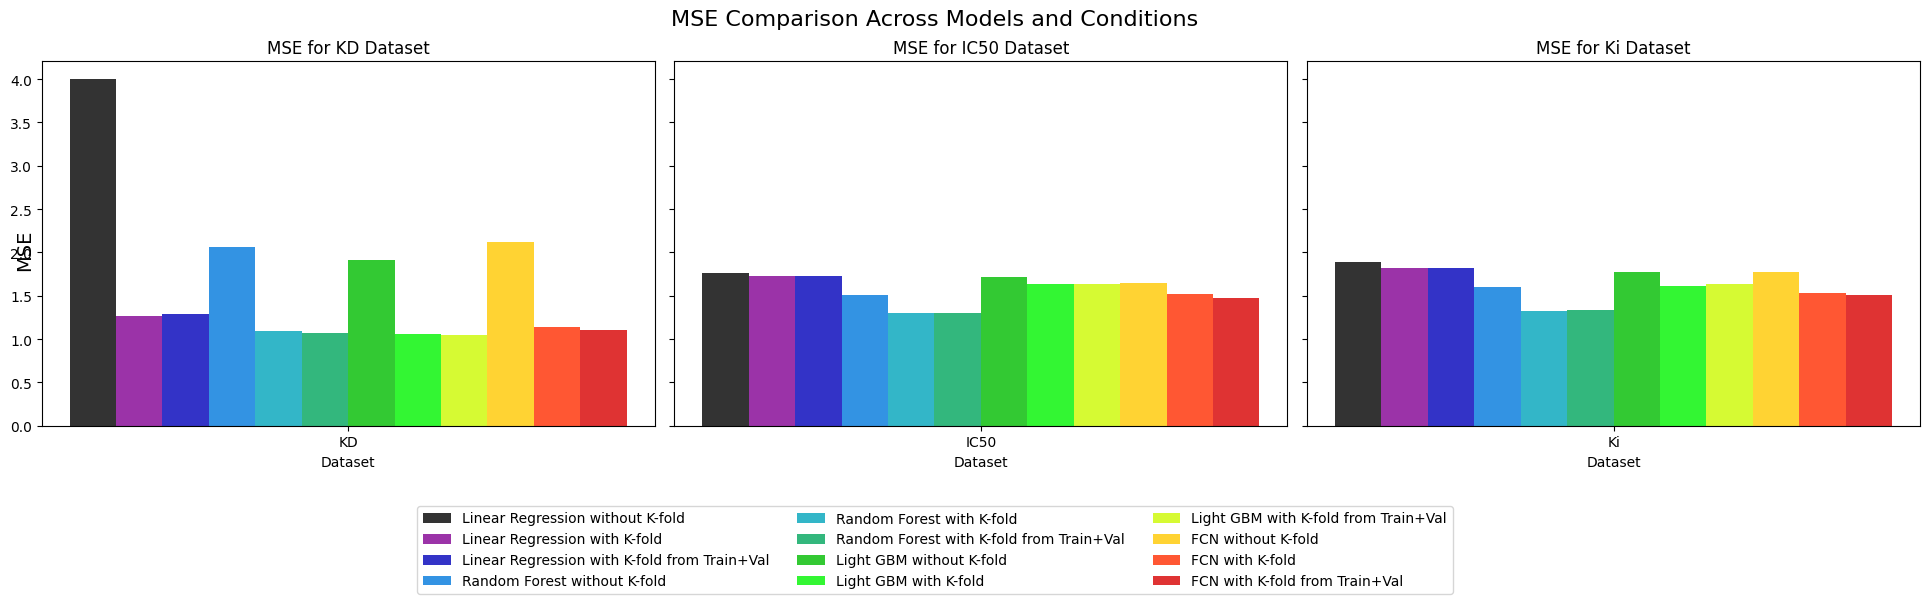

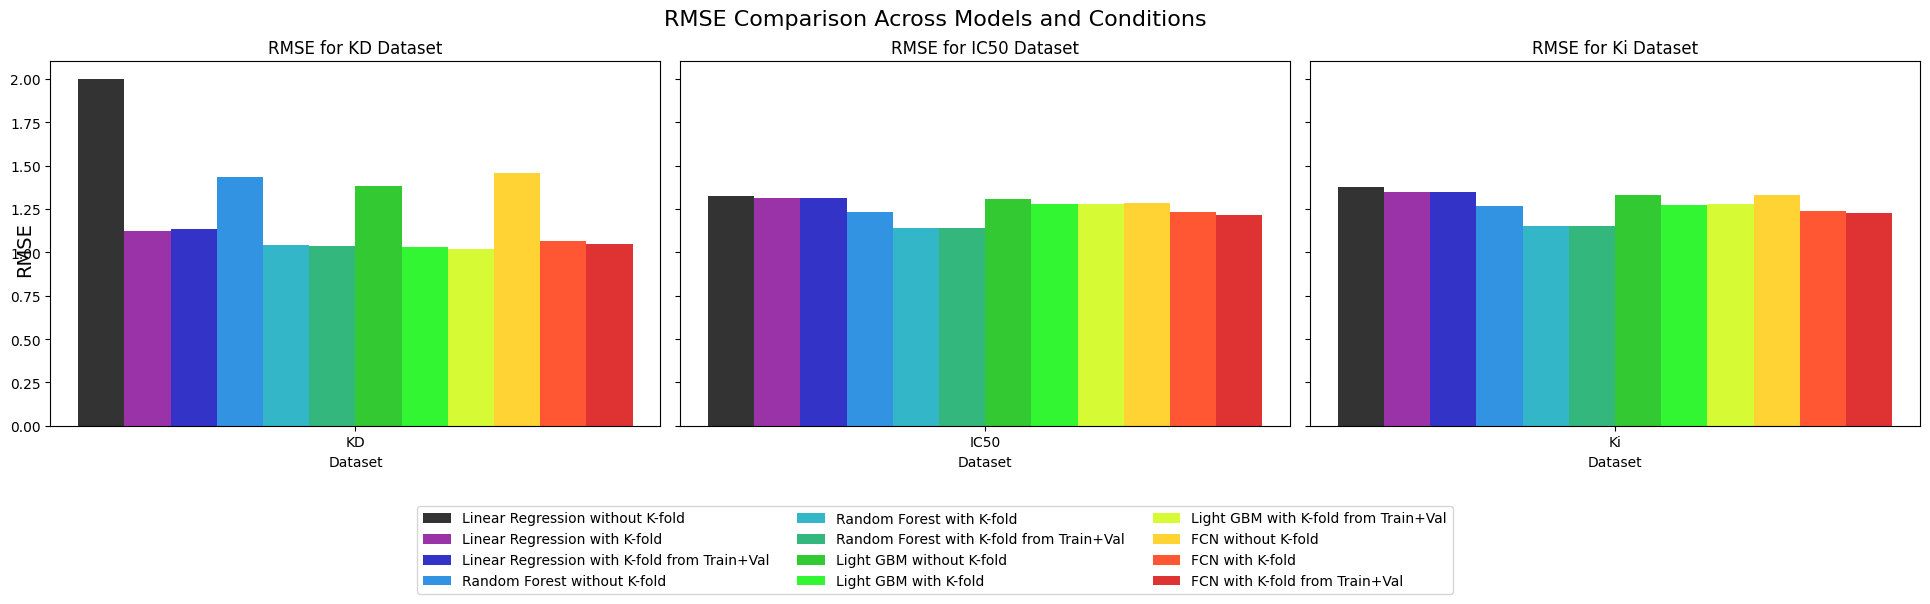

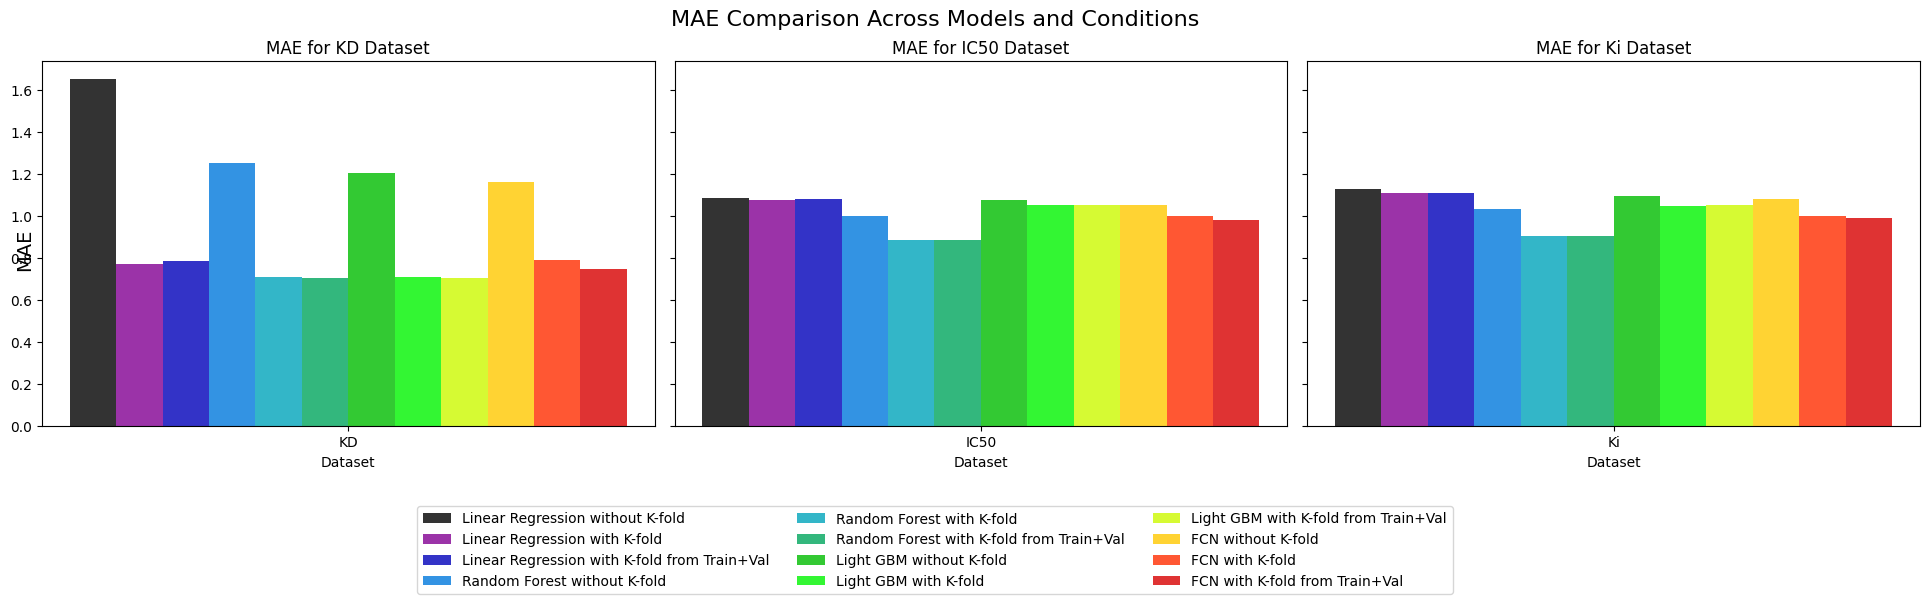

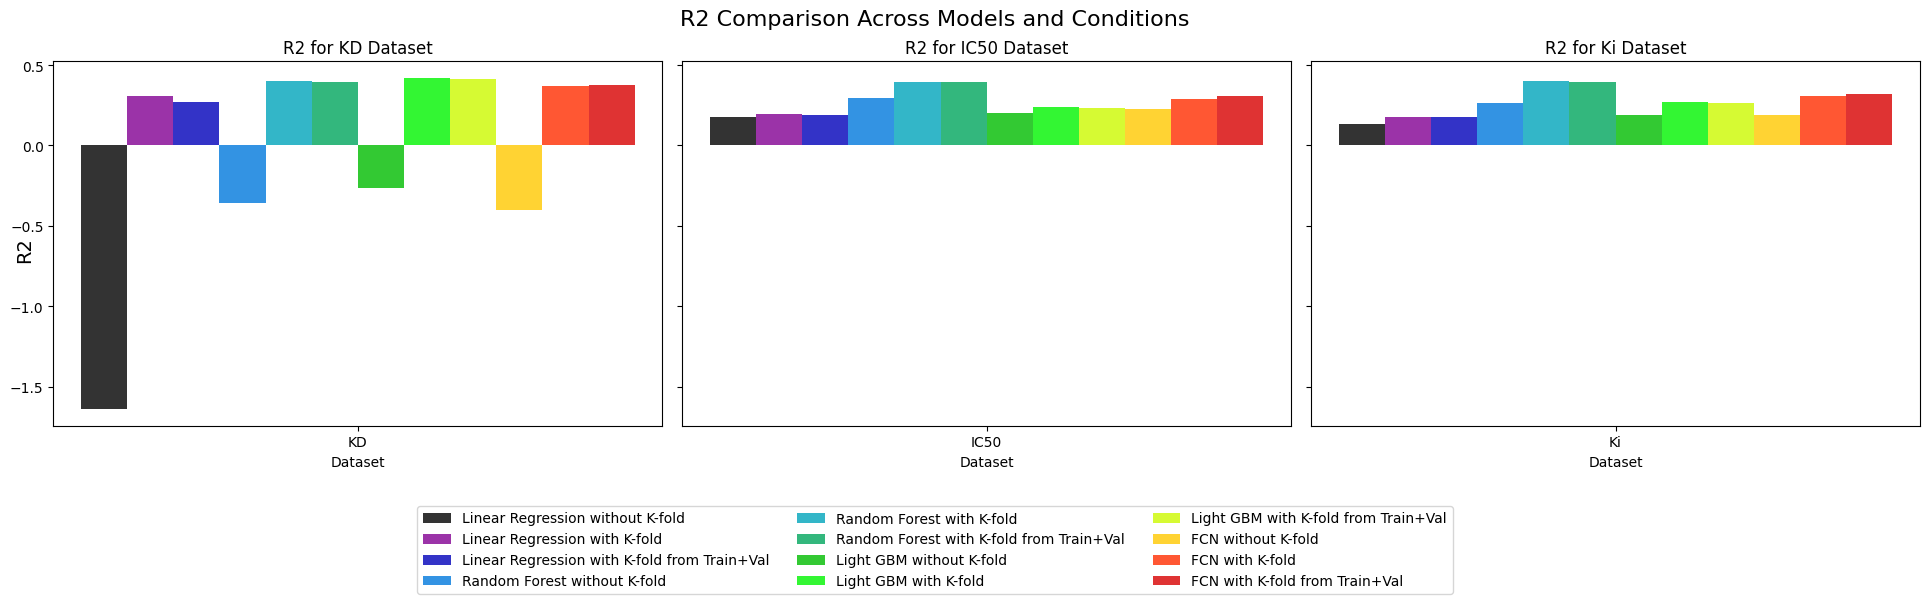

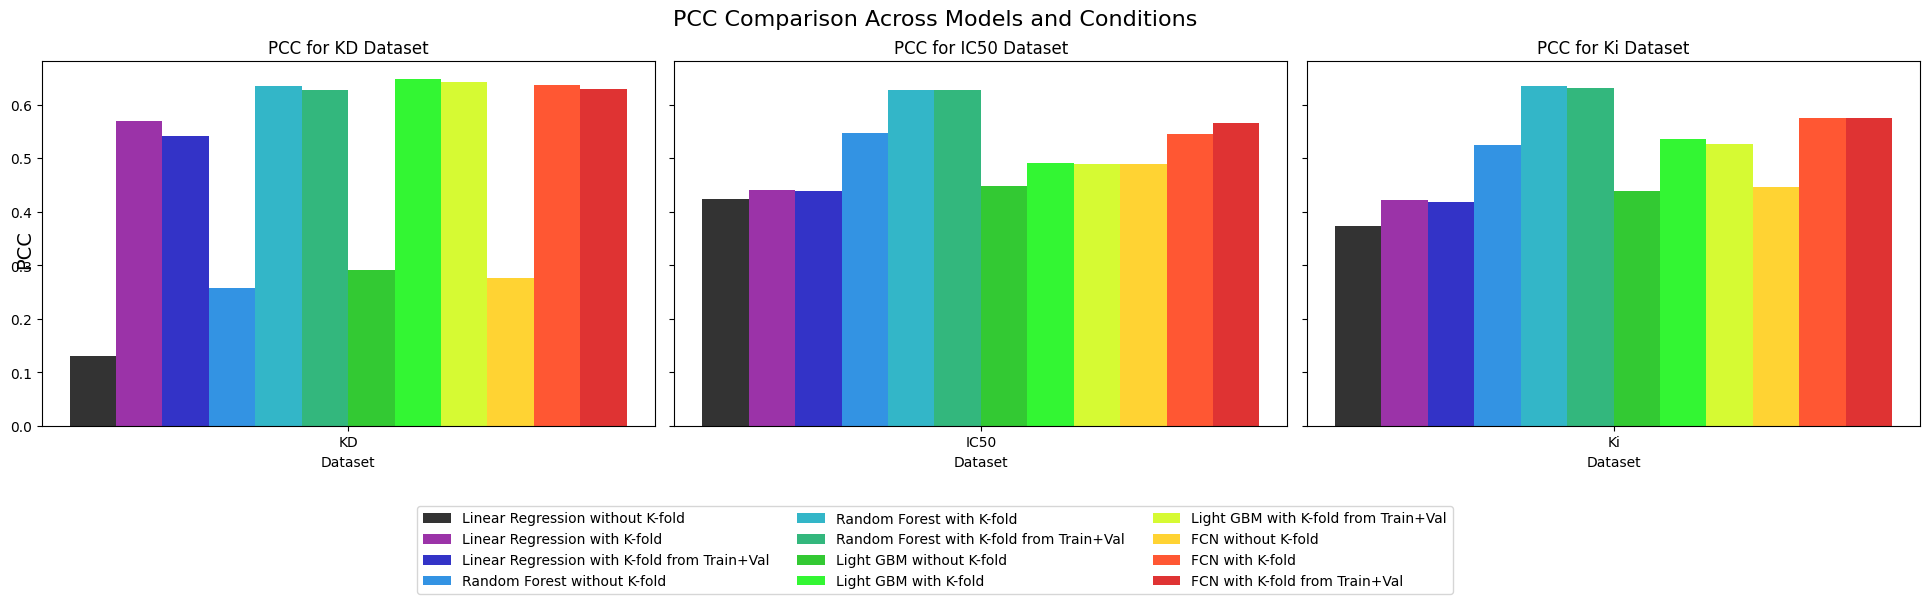

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
models = ["Linear Regression", "Random Forest", "Light GBM", "FCN"]
conditions = [" without K-fold", " with K-fold", " with K-fold from Train+Val"]
datasets = ["KD", "IC50", "Ki"]

# Expanded metrics dictionary to include the new third condition for each model and dataset
# The order is now: [without k-fold, with k-fold, with k-fold from Train+Val] for each dataset
metrics = {
    'MSE': {
        'KD': [4.0039, 1.2626, 1.2948, 2.0583, 1.0912, 1.0748, 1.9149, 1.0599, 1.0445, 2.1214, 1.1458, 1.1026],
        'IC50': [1.7578, 1.7293, 1.7318, 1.5145, 1.3023, 1.2983, 1.7140, 1.6359, 1.6406, 1.6525, 1.5252, 1.4799],
        'Ki': [1.8903, 1.8227, 1.8255, 1.6035, 1.3249, 1.3337, 1.7719, 1.6164, 1.6323, 1.7714, 1.5298, 1.5039]
    },
    'RMSE': {
        'KD': [2.0010, 1.1235, 1.1375, 1.4347, 1.0444, 1.0367, 1.3838, 1.0293, 1.0220, 1.4565, 1.0683, 1.0492],
        'IC50': [1.3258, 1.3150, 1.3160, 1.2306, 1.1412, 1.1394, 1.3092, 1.2790, 1.2809, 1.2855, 1.2346, 1.2161],
        'Ki': [1.3749, 1.3501, 1.3511, 1.2663, 1.1510, 1.1548, 1.3311, 1.2714, 1.2776, 1.3310, 1.2360, 1.2255]
    },
    'MAE': {
        'KD': [1.6522, 0.7716, 0.7835, 1.2527, 0.7067, 0.7034, 1.2054, 0.7062, 0.7051, 1.1622, 0.7875, 0.7454],
        'IC50': [1.0866, 1.0771, 1.0781, 1.0003, 0.8851, 0.8832, 1.0772, 1.0508, 1.0525, 1.0500, 0.9986, 0.9799],
        'Ki': [1.1277, 1.1080, 1.1095, 1.0303, 0.9028, 0.9057, 1.0965, 1.0464, 1.0523, 1.0809, 0.9992, 0.9875]
    },
    'R2': {
        'KD': [-1.6411, 0.3086, 0.2702, -0.3577, 0.4027, 0.3941, -0.2632, 0.4198, 0.4112, -0.3993, 0.3723, 0.3781],
        'IC50': [0.1788, 0.1932, 0.1919, 0.2924, 0.3924, 0.3941, 0.1992, 0.2367, 0.2344, 0.2280, 0.2884, 0.3093],
        'Ki': [0.1351, 0.1775, 0.1749, 0.2663, 0.4021, 0.3972, 0.1893, 0.2706, 0.2622, 0.1895, 0.3098, 0.3204]
    },
    'PCC': {
        'KD': [0.1310, 0.5700, 0.5420, 0.2578, 0.6347, 0.6280, 0.2912, 0.6481, 0.6416, 0.2764, 0.6358, 0.6297],
        'IC50': [0.4234, 0.4396, 0.4381, 0.5461, 0.6265, 0.6280, 0.4471, 0.4916, 0.4893, 0.4887, 0.5455, 0.5647],
        'Ki': [0.3736, 0.4217, 0.4185, 0.5246, 0.6350, 0.6313, 0.4387, 0.5348, 0.5263, 0.4455, 0.5750, 0.5751]
    }
}

# Function to plot a single metric across all datasets, models, and conditions
def plot_metric(metric_name, metrics_data):
    n_models = len(models)
    n_conditions = len(conditions)
    n_datasets = len(datasets)
    total_bars = n_models * n_conditions
    bar_width = 0.15
    opacity = 0.8
    
    # Set up the subplot for each dataset
    fig, axes = plt.subplots(1, n_datasets, figsize=(20, 5), sharey=True)
    
    for i, dataset in enumerate(datasets):
        ax = axes[i]
        index = np.arange(1)
        for j in range(total_bars):
            model_idx = j // n_conditions
            condition_idx = j % n_conditions
            metric_value = metrics_data[metric_name][dataset][j]
            
            ax.bar(index + bar_width * j, metric_value, bar_width, alpha=opacity,
                   label=f'{models[model_idx]}{conditions[condition_idx]}' if i == 0 else "",
                   color=plt.cm.nipy_spectral(j / total_bars))
        
        ax.set_xlabel('Dataset')
        ax.set_xticks(index + bar_width * (total_bars - 1) / 2)
        ax.set_xticklabels([dataset])
        ax.set_title(f'{metric_name} for {dataset} Dataset')
    
    # Add common Y label
    fig.text(0.04, 0.5, metric_name, va='center', rotation='vertical', fontsize=14)
    
    # Add a single legend
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0), ncol=3, fontsize=10)

    plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
    plt.suptitle(f'{metric_name} Comparison Across Models and Conditions', fontsize=16)
    plt.show()

# Plot for each metric
 # (Assuming you have the metrics dictionary already defined as shown previously)
for metric in ['MSE', 'RMSE', 'MAE', 'R2', 'PCC']:
    plot_metric(metric, metrics)

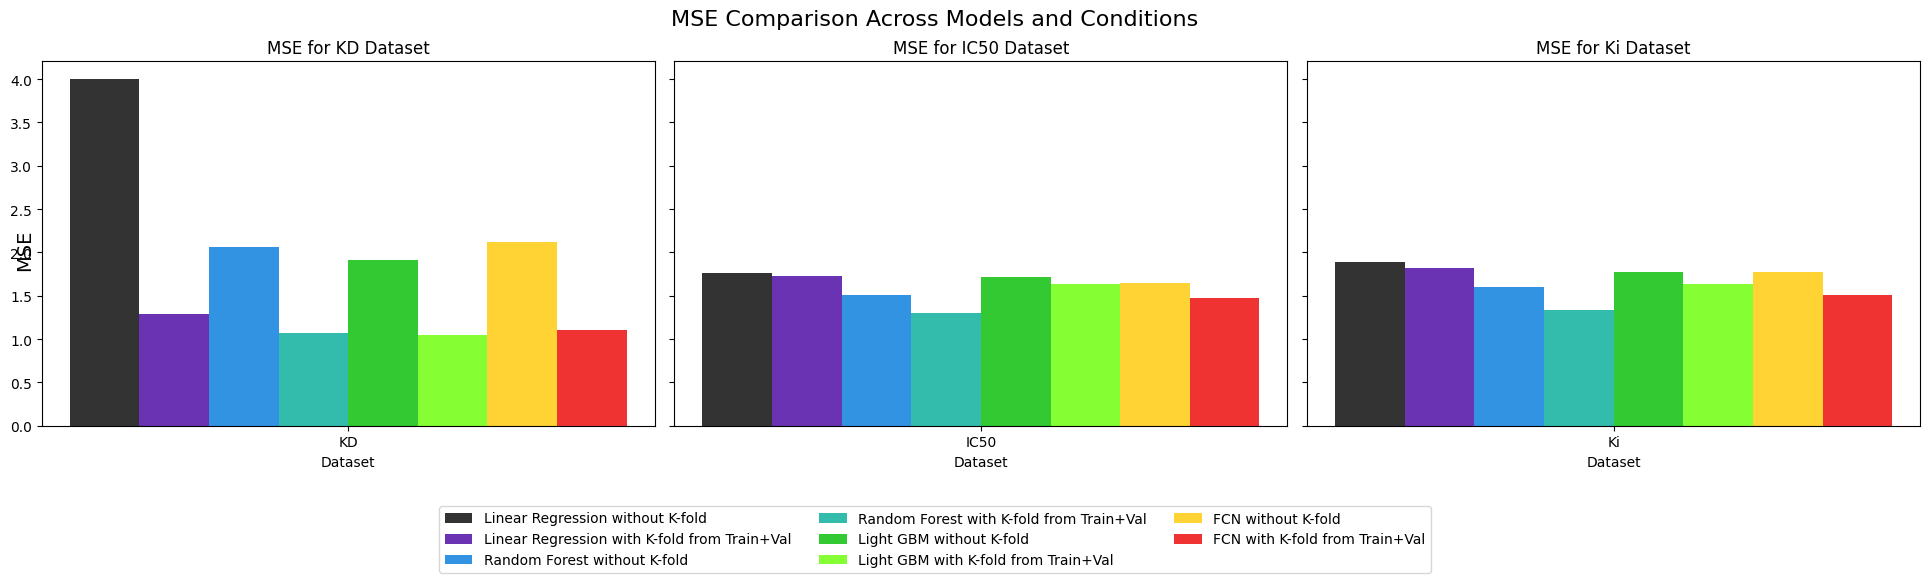

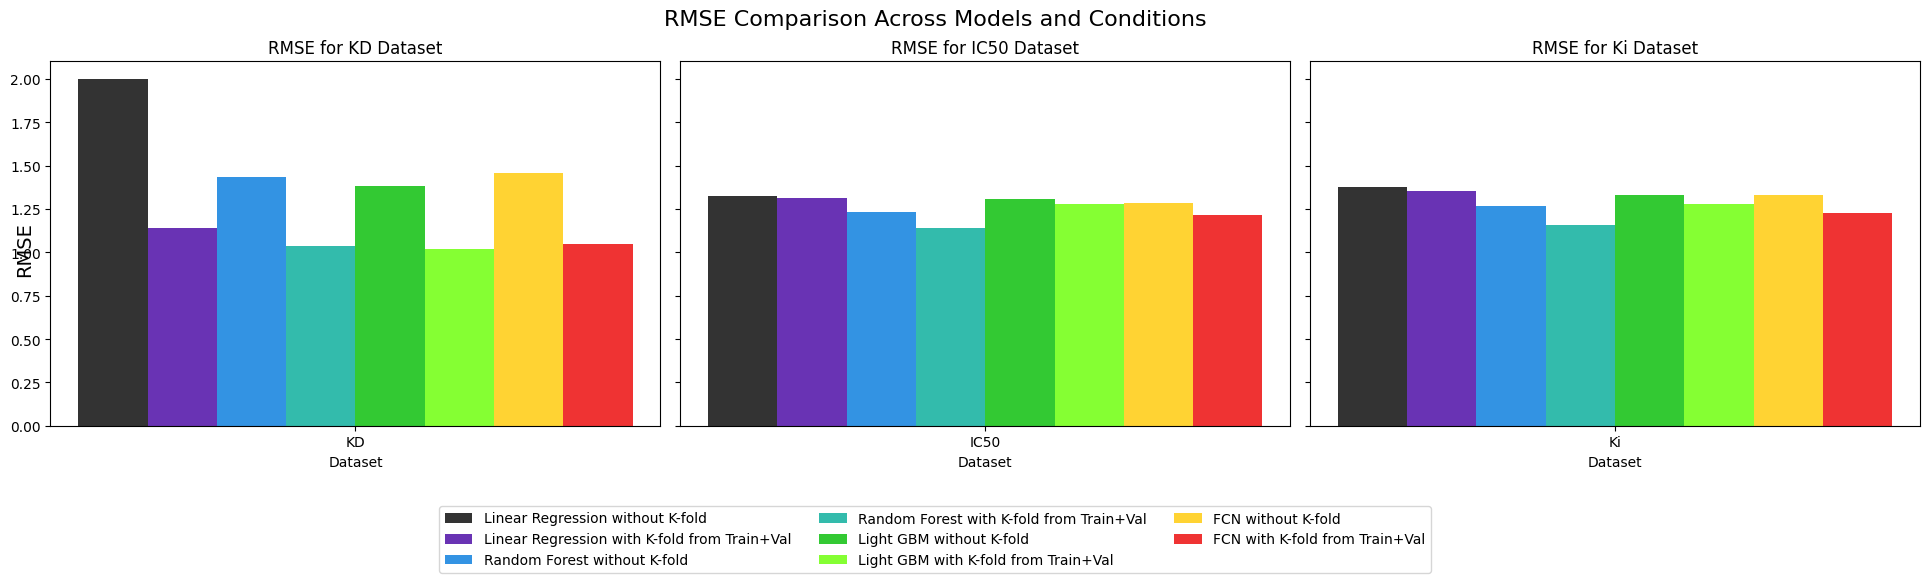

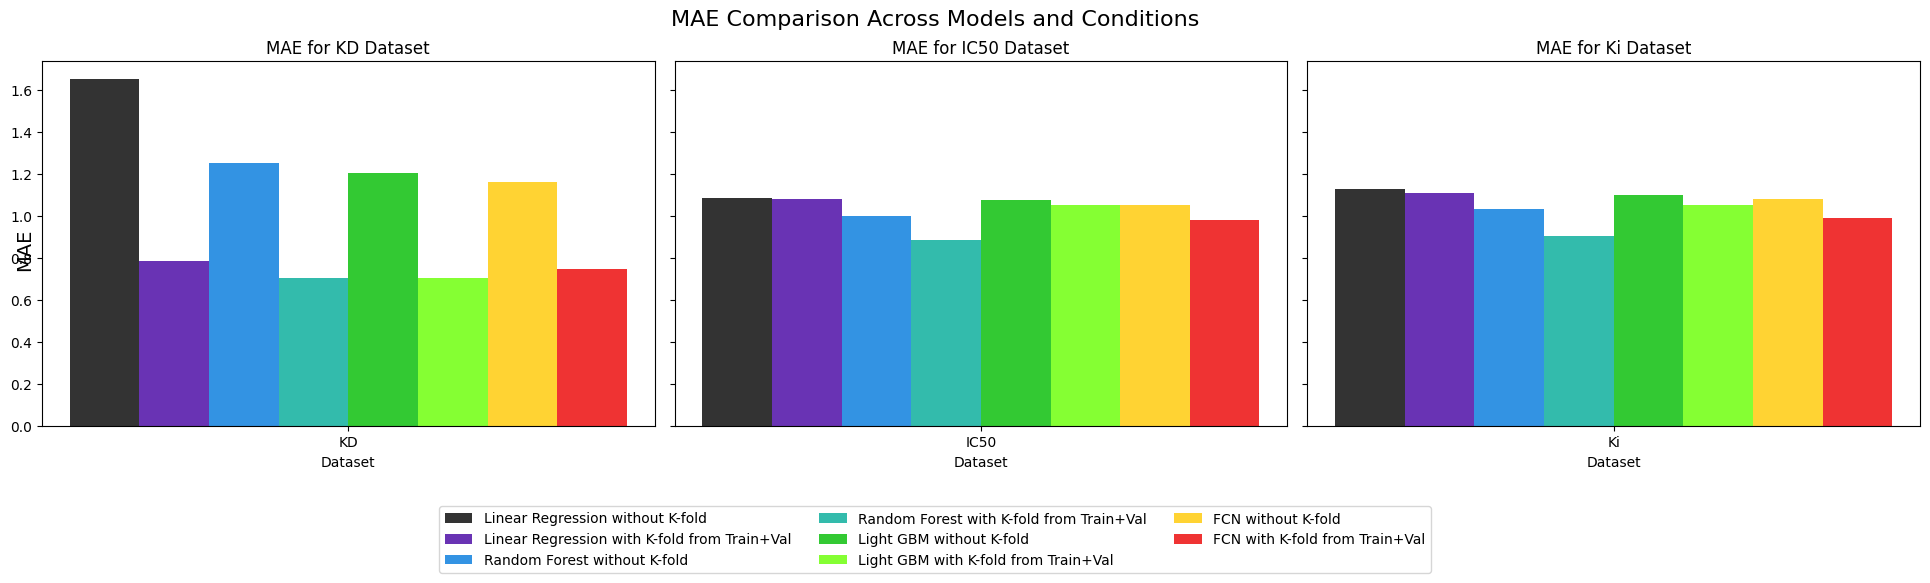

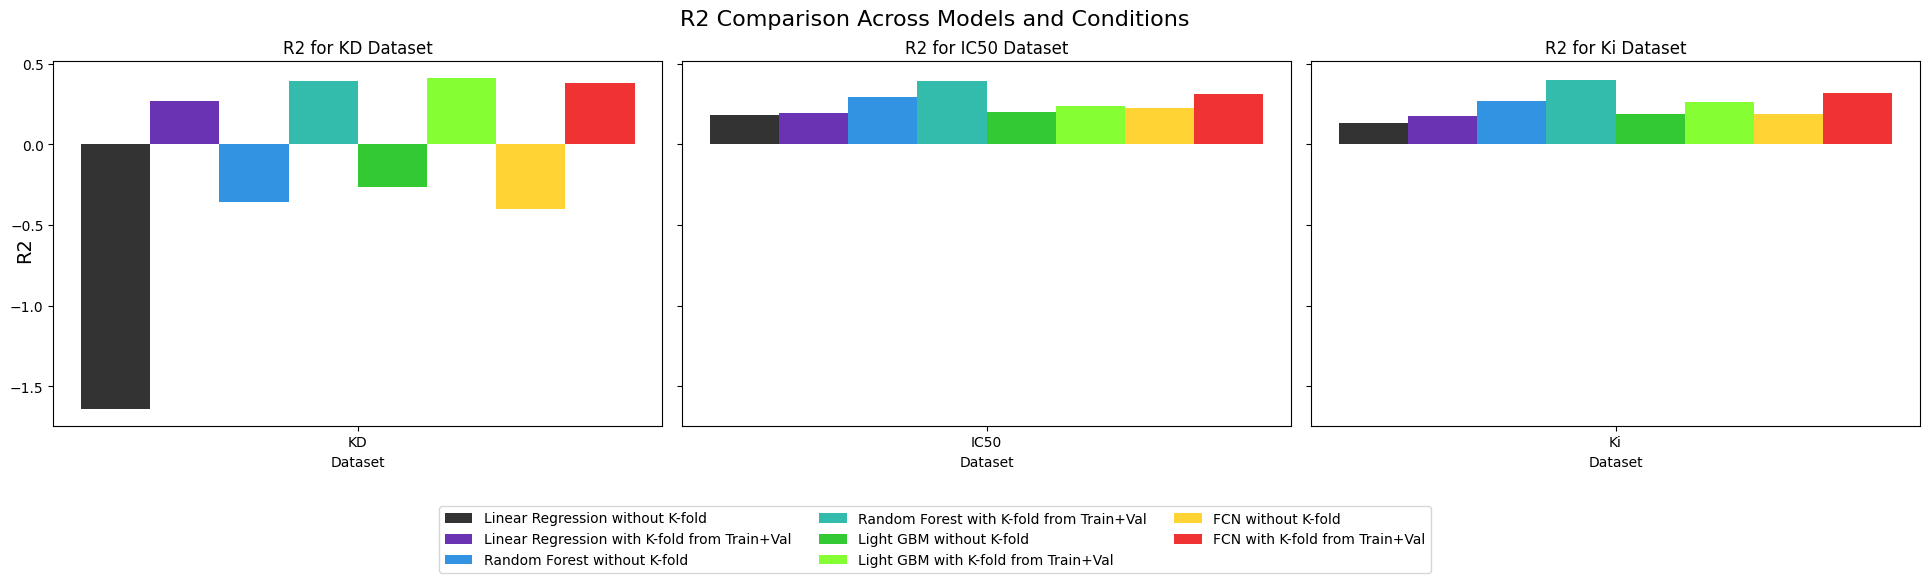

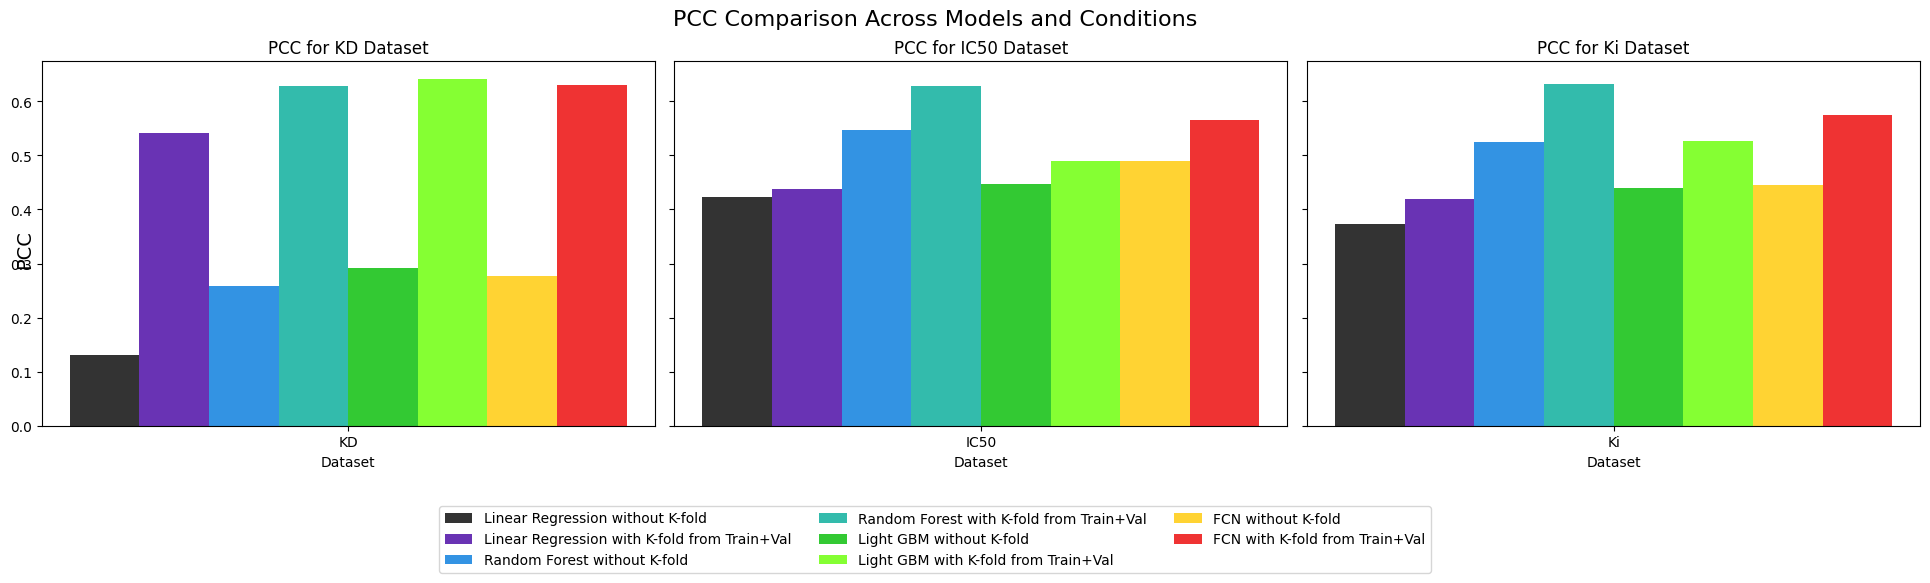

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
models = ["Linear Regression", "Random Forest", "Light GBM", "FCN"]
conditions = [" without K-fold", " with K-fold from Train+Val"]
datasets = ["KD", "IC50", "Ki"]

# Expanded metrics dictionary to include the new third condition for each model and dataset
# The order is now: [without k-fold, with k-fold from Train+Val] for each dataset
metrics = {
    'MSE': {
        'KD': [4.0039, 1.2948, 2.0583, 1.0748, 1.9149,  1.0445, 2.1214, 1.1026],
        'IC50': [1.7578, 1.7318, 1.5145, 1.2983, 1.7140, 1.6406, 1.6525, 1.4799],
        'Ki': [1.89037, 1.8255, 1.6035, 1.3337, 1.7719, 1.6323, 1.7714, 1.5039]
    },
    'RMSE': {
        'KD': [2.0010, 1.1375, 1.4347, 1.0367, 1.3838,  1.0220, 1.4565, 1.0492],
        'IC50': [1.3258, 1.3160, 1.2306, 1.1394, 1.3092,  1.2809, 1.2855, 1.2161],
        'Ki': [1.3749, 1.3511, 1.2663, 1.1548, 1.3311,  1.2776, 1.3310, 1.2255]
    },
    'MAE': {
        'KD': [1.6522,  0.7835, 1.2527,  0.7034, 1.2054, 0.7051, 1.1622, 0.7454],
        'IC50': [1.0866,  1.0781, 1.0003,  0.8832, 1.0772, 1.0525, 1.0500, 0.9799],
        'Ki': [1.1277,  1.1095, 1.0303,  0.9057, 1.0965, 1.0523, 1.0809, 0.9875]
    },
    'R2': {
        'KD': [-1.6411, 0.2702, -0.3577, 0.3941, -0.2632, 0.4112, -0.3993, 0.3781],
        'IC50': [0.1788, 0.1919, 0.2924, 0.3941, 0.1992, 0.2344, 0.2280, 0.3093],
        'Ki': [0.1351, 0.1749, 0.2663, 0.3972, 0.1893, 0.2622, 0.1895, 0.3204]
    },
    'PCC': {
        'KD': [0.1310, 0.5420, 0.2578, 0.6280, 0.2912, 0.6416, 0.2764, 0.6297],
        'IC50': [0.4234, 0.4381, 0.5461, 0.6280, 0.4471, 0.4893, 0.4887, 0.5647],
        'Ki': [0.3736, 0.4185, 0.5246, 0.6313, 0.4387, 0.5263, 0.4455, 0.5751]
    }
}

# Function to plot a single metric across all datasets, models, and conditions
def plot_metric(metric_name, metrics_data):
    n_models = len(models)
    n_conditions = len(conditions)
    n_datasets = len(datasets)
    total_bars = n_models * n_conditions
    bar_width = 0.15
    opacity = 0.8
    
    # Set up the subplot for each dataset
    fig, axes = plt.subplots(1, n_datasets, figsize=(20, 5), sharey=True)
    
    for i, dataset in enumerate(datasets):
        ax = axes[i]
        index = np.arange(1)
        for j in range(total_bars):
            model_idx = j // n_conditions
            condition_idx = j % n_conditions
            metric_value = metrics_data[metric_name][dataset][j]
            
            ax.bar(index + bar_width * j, metric_value, bar_width, alpha=opacity,
                   label=f'{models[model_idx]}{conditions[condition_idx]}' if i == 0 else "",
                   color=plt.cm.nipy_spectral(j / total_bars))
        
        ax.set_xlabel('Dataset')
        ax.set_xticks(index + bar_width * (total_bars - 1) / 2)
        ax.set_xticklabels([dataset])
        ax.set_title(f'{metric_name} for {dataset} Dataset')
    
    # Add common Y label
    fig.text(0.04, 0.5, metric_name, va='center', rotation='vertical', fontsize=14)
    
    # Add a single legend
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0), ncol=3, fontsize=10)

    plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
    plt.suptitle(f'{metric_name} Comparison Across Models and Conditions', fontsize=16)
    plt.show()

# Plot for each metric
 # (Assuming you have the metrics dictionary already defined as shown previously)
for metric in ['MSE', 'RMSE', 'MAE', 'R2', 'PCC']:
    plot_metric(metric, metrics)

# Hyperparameter Tuning LightGBM model kd dataset

In [ ]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
import math

# Assuming concatenated_embeddings_split_kd, filtered_split_kd are defined
# and prepare_embeddings_for_visualization function is defined as before

# Prepare the combined training and validation sets for the Kd dataset
X_train_kd = prepare_embeddings_for_visualization(concatenated_embeddings_split_kd['train'])
y_train_kd = np.array(filtered_split_kd['train']['labels'])
X_val_kd = prepare_embeddings_for_visualization(concatenated_embeddings_split_kd['valid'])
y_val_kd = np.array(filtered_split_kd['valid']['labels'])

# Combine the training and validation sets
X_train_val_kd = np.concatenate([X_train_kd, X_val_kd], axis=0)
y_train_val_kd = np.concatenate([y_train_kd, y_val_kd], axis=0)

# Prepare the test set for the Kd dataset
X_test_kd = prepare_embeddings_for_visualization(concatenated_embeddings_split_kd['test'])
y_test_kd = np.array(filtered_split_kd['test']['labels'])

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 5, 6, 7],  # Adjusted max_depth values
    'num_leaves': [8, 16, 32, 64],  # Adjusted num_leaves values to satisfy 2^max_depth > num_leaves
}


# Initialize k-fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the LightGBM model for GridSearchCV
lgb_model = lgb.LGBMRegressor(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Perform hyperparameter tuning
grid_search.fit(X_train_val_kd, y_train_val_kd)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model using the test set
best_model = grid_search.best_estimator_

y_pred_test_kd = best_model.predict(X_test_kd)
test_mse = mean_squared_error(y_test_kd, y_pred_test_kd)
test_rmse = math.sqrt(test_mse)
test_mae = mean_absolute_error(y_test_kd, y_pred_test_kd)
test_r2 = r2_score(y_test_kd, y_pred_test_kd)
test_pcc, _ = pearsonr(y_test_kd, y_pred_test_kd)

print("Test Metrics with Best Hyperparameters:")
print(f"MSE: {test_mse:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAE: {test_mae:.4f}")
print(f"R2 Score: {test_r2:.4f}")
print(f"Pearson Correlation Coefficient: {test_pcc:.4f}")
